<a href="https://colab.research.google.com/github/Vixuz144/Econometria/blob/main/Regresi%C3%B3n_lineal_migraci%C3%B3n.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [159]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime
from scipy.stats import t

In [160]:
base1 = pd.read_excel('Datos.xlsx')

In [161]:
primera_fecha = datetime.datetime.fromisoformat("2010-01-01")
ultima_fecha = datetime.datetime.fromisoformat("2024-11-01")
print(primera_fecha)
print(ultima_fecha)

2010-01-01 00:00:00
2024-11-01 00:00:00


In [162]:
a = base1.to_numpy()
m = a[:,0]

base = np.delete(a, 0, 1)

l = list(base[:,0])
n = len(base[:,1])

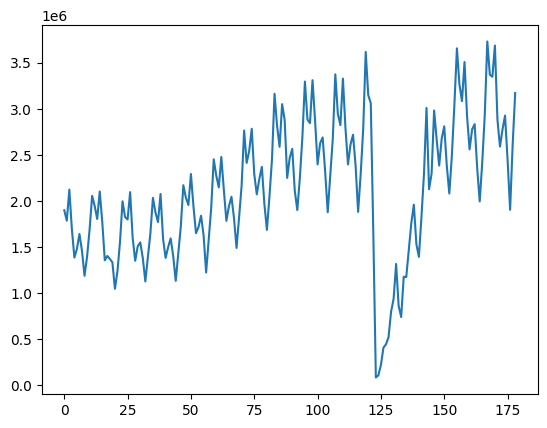

In [163]:
plt.plot(base[:,0])
plt.show()

#Modelo AR

In [164]:
meses = np.array([])
for i in range(0,n):
  meses = np.append(meses,m[i][-2:])

t12 = pd.get_dummies(meses).to_numpy()
print(t12)
x_mes = np.stack([np. ones(n), t12[:, 1], t12[:, 2], t12[:, 3], t12[:, 4], t12[:, 5], t12[:, 6], t12[:, 7], t12[:, 8], t12[:, 9], t12[:, 10], t12[:, 11]], axis = 1)

n_param = len(x_mes[1,:])
grad_lib = n - n_param
print(n, grad_lib, n_param)

[[ True False False ... False False False]
 [False  True False ... False False False]
 [False False  True ... False False False]
 ...
 [False False False ... False False False]
 [False False False ...  True False False]
 [False False False ... False  True False]]
179 167 12


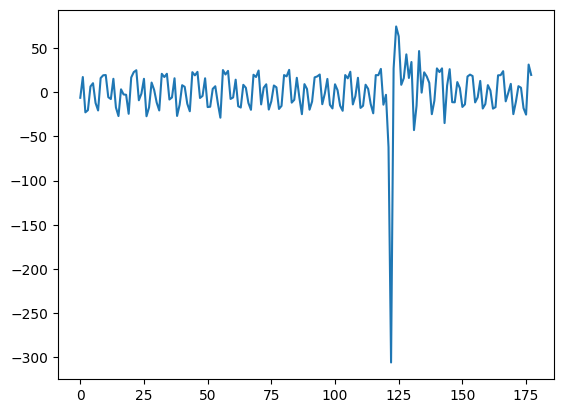

In [165]:
##Variable Exógena
y1 = 100 * np.diff(np.log(np.array(base[:, 0], float)))
plt.plot(y1)
plt.show()

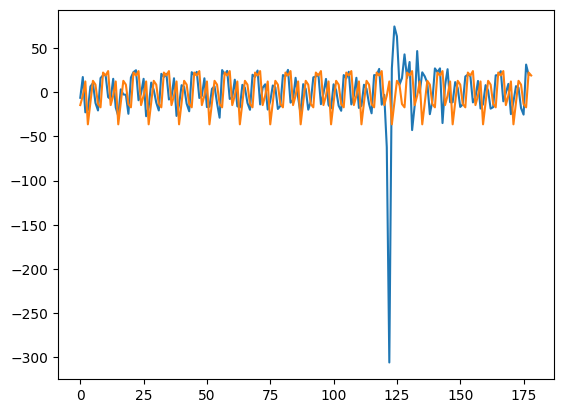

In [166]:
At = np.transpose(x_mes[1:, :]).dot(x_mes[1:, :])
Bt = np.transpose(x_mes[1:, :]).dot(y1)
gamma_est = np.linalg.solve(At,Bt)
#print(gamma_est)
gamma_mes = gamma_est + np.mean(y1)

y_est = np.dot(x_mes, gamma_est)
plt.plot(y1)
plt.plot(y_est)
plt.show()

In [167]:
res = y1 - y_est[1:]
it = np.linalg.inv(At)
var_mes = np.diag(np.var(res,ddof=n_param)*it)
desv_mes = np.sqrt(var_mes)

In [168]:


t_stad = gamma_est/desv_mes



p_val = t.cdf(-np.abs(t_stad), grad_lib) + 1 - t.cdf(np.abs(t_stad), grad_lib)
print(p_val)

[3.08361786e-02 2.48526246e-01 4.16173867e-03 1.90135532e-02
 7.13743024e-01 3.26086473e-03 1.27809554e-02 9.01938797e-01
 7.81643746e-01 9.42563307e-05 3.63763514e-04 6.10116526e-05]


In [169]:
dec = 20
tabla = pd.DataFrame(np.round(np.stack((gamma_est, desv_mes, t_stad, p_val), 1),dec),
                     index = ["const", 'feb', 'mar', 'abr', 'may', 'jun', 'jul', 'ago', 'sep', 'oct', 'nov', 'dic'],
                     columns = ['beta_hat', 'desv', 't_stad', 'p_val'])

print(tabla)

        beta_hat      desv    t_stad     p_val
const -14.428035  6.625558 -2.177633  0.030836
feb    10.667836  9.212465  1.157978  0.248526
mar    26.768313  9.212465  2.905662  0.004162
abr   -21.817886  9.212465 -2.368301  0.019014
may     3.385190  9.212465  0.367458  0.713743
jun    27.500224  9.212465  2.985110  0.003261
jul    23.187077  9.212465  2.516924  0.012781
ago     1.136818  9.212465  0.123400  0.901939
sep    -2.557609  9.212465 -0.277625  0.781644
oct    36.868224  9.212465  4.001993  0.000094
nov    33.529722  9.212465  3.639604  0.000364
dic    38.544945  9.369955  4.113675  0.000061


#Modelo AR y MA

In [170]:
##Variable Exógena
y1 = 100 * np.diff(np.log(np.array(base[:, 0], float)))

#unos = np.ones(n)
IPC = 100 * np.diff(np.log(np.array(base[:, 1], float)))
Tasa_delitos = 100 * np.diff(np.log(np.array(base[:, 2], float)))
Escolaridad = 100 * np.diff(np.log(np.array(base[:, 3], float)))

#print(np.exp(energeticos/100))
#print(energeticos)

x1 = np.stack((np.ones(n-1),IPC, Tasa_delitos, Escolaridad), axis = 1)
print(y1.shape)
#print(x1)


(178,)


In [171]:
xm = x_mes[1:, :]
At = np.transpose(xm).dot(xm)
Bt = np.transpose(xm).dot(y1)
n_gamma = len(At)
gamma_est = np.linalg.solve(At,Bt)
y_mes = np.dot(xm,gamma_est)
res_gamma = y1 - y_mes
gamma_mes = gamma_est + np.mean(y1)



it = np.linalg.inv(At)
var_mes = np.diag(np.var(res_gamma,ddof=n_gamma)*it)
desv_mes = np.sqrt(var_mes)


A = np.transpose(x1).dot(x1)
B = np.transpose(x1).dot(y1)
n_beta = len(A)
beta_est =  np.linalg.solve(A,B)
#print(beta_est)

y1_est = x1.dot(beta_est)
e_est = y1 - y1_est

ix = np.linalg.inv(A)
var_x = np.diag(np.var(e_est,ddof=n_beta)*ix)
desv_x = np.sqrt(var_x)

In [172]:
n_param = len(gamma_est)
grad_lib1 = n - n_param
print(grad_lib1)
t_stad1 = gamma_est/desv_mes

n_param = len(beta_est)
grad_lib2 = n - n_param
print(grad_lib2)
t_stad2 = beta_est/desv_x
# print(t_stad1)
# print(t_stad2)
t_stad = np.concatenate((t_stad1, t_stad2))
#print(t_stad)

p_val1 = t.cdf(-np.abs(t_stad1), grad_lib1) + 1 - t.cdf(np.abs(t_stad1), grad_lib1)
p_val2 = t.cdf(-np.abs(t_stad2), grad_lib2) + 1 - t.cdf(np.abs(t_stad2), grad_lib2)

p_val = np.concatenate((p_val1, p_val2))
print(p_val)

167
175
[3.08361786e-02 2.48526246e-01 4.16173867e-03 1.90135532e-02
 7.13743024e-01 3.26086473e-03 1.27809554e-02 9.01938797e-01
 7.81643746e-01 9.42563307e-05 3.63763514e-04 6.10116526e-05
 5.07933503e-01 7.34208405e-02 6.14325537e-08 1.32174198e-02]


In [173]:
esti = np.concatenate((gamma_est, beta_est))
desv = np.concatenate((desv_mes, desv_x))
tabla = pd.DataFrame(np.round(np.stack((esti, desv, t_stad, p_val), 1),5),
                     index = ["const", 'feb', 'mar', 'abril', 'may', 'jun', 'jul', 'ago', 'sep', 'oct', 'nov', 'dic', 'const2', 'IPC', 'T_Del', 'Esc'],
                     columns = ['beta_hat', 'desv', 't_stad', 'p_val'])

print(tabla)

        beta_hat     desv   t_stad    p_val
const  -14.42803  6.62556 -2.17763  0.03084
feb     10.66784  9.21247  1.15798  0.24853
mar     26.76831  9.21247  2.90566  0.00416
abril  -21.81789  9.21247 -2.36830  0.01901
may      3.38519  9.21247  0.36746  0.71374
jun     27.50022  9.21247  2.98511  0.00326
jul     23.18708  9.21247  2.51692  0.01278
ago      1.13682  9.21247  0.12340  0.90194
sep     -2.55761  9.21247 -0.27762  0.78164
oct     36.86822  9.21247  4.00199  0.00009
nov     33.52972  9.21247  3.63960  0.00036
dic     38.54494  9.36995  4.11367  0.00006
const2   1.42154  2.14274  0.66342  0.50793
IPC      0.89548  0.49721  1.80102  0.07342
T_Del    1.76366  0.31170  5.65812  0.00000
Esc    -14.60971  5.83600 -2.50338  0.01322


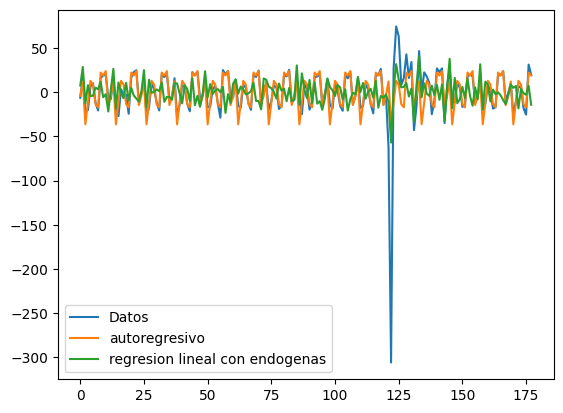

In [174]:
plt.plot(y1, label='Datos')
plt.plot(y_mes,label='autoregresivo')
plt.plot(y1_est,label='regresion lineal con endogenas')
plt.legend()
plt.show()

#Modelo ARIMA

In [175]:
x = np.stack([np. ones(n-1), t12[1:, 1], t12[1:, 2], t12[1:, 3], t12[1:, 4], t12[1:, 5], t12[1:, 6], t12[1:, 7], t12[1:, 8], t12[1:, 9], t12[1:, 10], t12[1:, 11],IPC, Tasa_delitos, Escolaridad], axis = 1)
A = np.transpose(x).dot(x)
B = np.transpose(x).dot(y1)
n_coef = len(A)
coef_est = np.linalg.solve(A,B)
y2 = np.dot(x,coef_est)
res = y1 - y2
# gamma_mes = gamma_est + np.mean(y1)



i = np.linalg.inv(A)
var = np.diag(np.var(res,ddof=n_coef)*i)
desv = np.sqrt(var)


# A = np.transpose(x1).dot(x1)
# B = np.transpose(x1).dot(y1)
# n_beta = len(A)
# beta_est =  np.linalg.solve(A,B)
# #print(beta_est)

# y1_est = x1.dot(beta_est)
# e_est = y1 - y1_est

# ix = np.linalg.inv(A)
# var_x = np.diag(np.var(e_est,ddof=n_beta)*ix)
# desv_x = np.sqrt(var_x)

In [176]:
grad_lib = n - n_coef
print(grad_lib)
t_stad = coef_est/desv


p_val = t.cdf(-np.abs(t_stad), grad_lib) + 1 - t.cdf(np.abs(t_stad), grad_lib)
print(p_val)

164
[0.91756572 0.96297172 0.34178871 0.49863008 0.22036174 0.31745348
 0.44097358 0.34710738 0.71676933 0.57872585 0.031435   0.06032861
 0.55288814 0.         0.37204017]


In [177]:
tabla = pd.DataFrame(np.round(np.stack((coef_est, desv, t_stad, p_val), 1),5),
                     index = ["const", 'feb', 'mar', 'abril', 'may', 'jun', 'jul', 'ago', 'sep', 'oct', 'nov', 'dic', 'IPC', 'T_Del', 'Esc'],
                     columns = ['beta_hat', 'desv', 't_stad', 'p_val'])

print(tabla)

       beta_hat      desv   t_stad    p_val
const  -2.06766  19.94651 -0.10366  0.91757
feb    -0.95771  20.59773 -0.04650  0.96297
mar   -20.00910  20.98701 -0.95340  0.34179
abril -13.98196  20.61769 -0.67815  0.49863
may   -25.52863  20.75061 -1.23026  0.22036
jun    20.62817  20.57138  1.00276  0.31745
jul    15.88849  20.56959  0.77243  0.44097
ago   -19.46834  20.64681 -0.94292  0.34711
sep    -7.48046  20.58429 -0.36341  0.71677
oct    11.49887  20.66818  0.55636  0.57873
nov    44.78918  20.63886  2.17014  0.03143
dic    38.99915  20.61876  1.89144  0.06033
IPC     0.21835   0.36718  0.59466  0.55289
T_Del   3.25130   0.32950  9.86733  0.00000
Esc   -13.63617  15.23407 -0.89511  0.37204


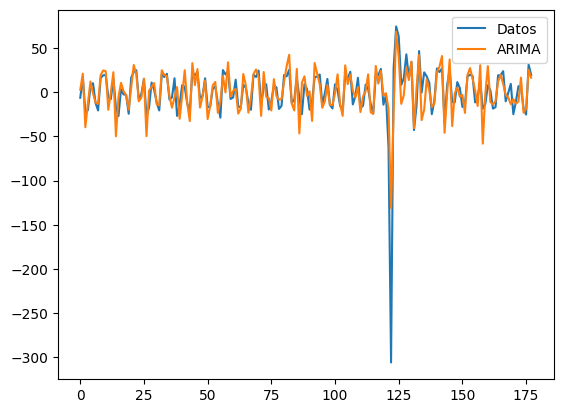

In [178]:
plt.plot(y1, label='Datos')
plt.plot(y2,label='ARIMA')

plt.legend()
plt.show()

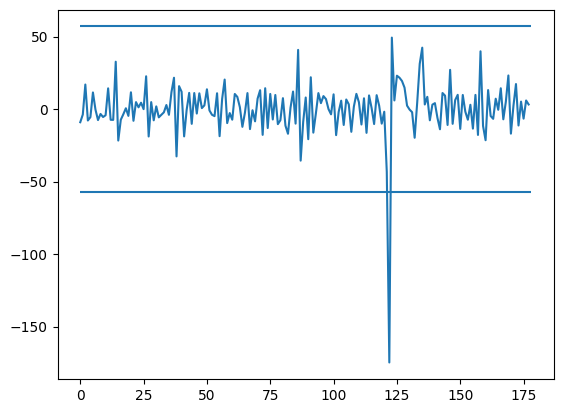

In [179]:
plt.plot(res)
plt.hlines(3*np.std(res, ddof = 1), xmin=0, xmax = n-1)
plt.hlines(-3*np.std(res, ddof = 1), xmin=0, xmax = n-1)
plt.show()

In [180]:
print(n, len(x))
o = np.zeros(n-1)
o[np.argmin(res)] = 1
print(o[np.argmin(res)-2:np.argmin(res)+3], np.argmin(res))

179 178
[0. 0. 1. 0. 0.] 122


          beta_hat      desv    t_stad    p_val
const     -7.60260  10.90363  -0.69725  0.48664
feb        4.49070  11.25927   0.39884  0.69053
mar        7.03456  11.55133   0.60898  0.54339
abril     -4.53074  11.27707  -0.40177  0.68839
may       -8.30088  11.37342  -0.72985  0.46654
jun       22.26645  11.24175   1.98069  0.04932
jul       17.65323  11.24082   1.57046  0.11826
ago       -8.21376  11.29727  -0.72706  0.46824
sep       -6.47123  11.24861  -0.57529  0.56589
oct       24.97347  11.31526   2.20706  0.02872
nov       34.63348  11.29022   3.06757  0.00253
dic       35.15269  11.26904   3.11940  0.00215
IPC        0.67368   0.20199   3.33525  0.00106
T_Del      1.14620   0.20968   5.46639  0.00000
Esc       -7.08859   8.33152  -0.85082  0.39613
2020-03 -256.54065  13.09415 -19.59201  0.00000


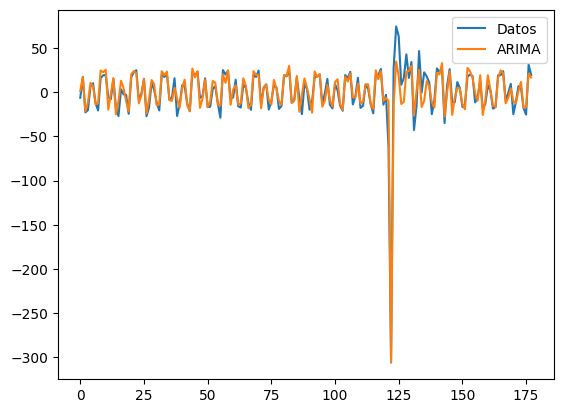

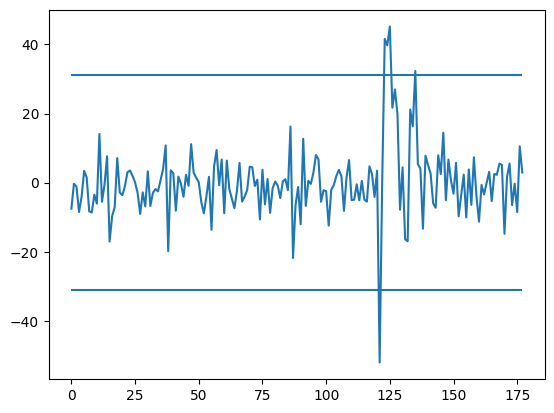

          beta_hat      desv    t_stad    p_val
const     -7.13919   9.89151  -0.72175  0.47150
feb        3.71229  10.21465   0.36343  0.71676
mar       13.43771  10.53318   1.27575  0.20388
abril     -5.81480  10.23222  -0.56828  0.57063
may       -8.53587  10.31745  -0.82732  0.40928
jun       21.74133  10.19831   2.13186  0.03454
jul       17.25722  10.19730   1.69233  0.09252
ago       -8.48995  10.24840  -0.82842  0.40866
sep       -7.55033  10.20575  -0.73981  0.46049
oct       25.57024  10.26510   2.49099  0.01375
nov       33.14379  10.24492   3.23514  0.00148
dic       34.74477  10.22292   3.39871  0.00085
IPC        0.24102   0.19696   1.22368  0.22286
T_Del      0.96635   0.19257   5.01822  0.00000
Esc       -7.01082   7.55793  -0.92761  0.35500
2020-03 -259.82507  11.89099 -21.85059  0.00000
2020-02  -66.24638  11.06251  -5.98837  0.00000


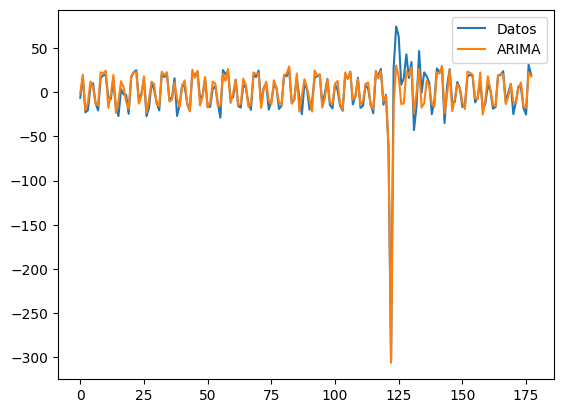

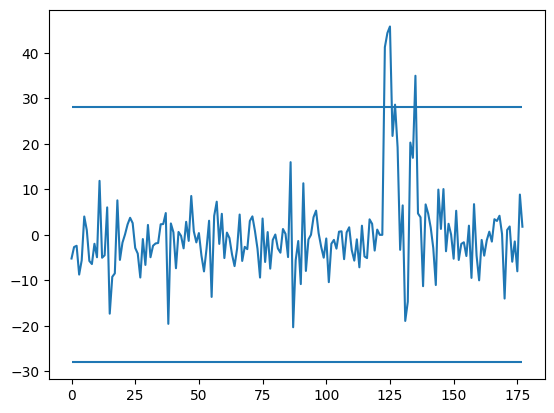

          beta_hat      desv    t_stad    p_val
const     -7.68090   9.13820  -0.84053  0.40187
feb        4.25386   9.43670   0.45078  0.65276
mar       16.01576   9.74231   1.64394  0.10215
abril     -6.07199   9.45250  -0.64237  0.52155
may       -6.88098   9.53613  -0.72157  0.47161
jun       21.91170   9.42110   2.32581  0.02128
jul       14.01408   9.43958   1.48461  0.13962
ago       -7.40567   9.46949  -0.78206  0.43534
sep       -7.42584   9.42795  -0.78764  0.43207
oct       26.84442   9.48574   2.82998  0.00525
nov       32.21034   9.46572   3.40284  0.00084
dic       34.38719   9.44402   3.64116  0.00037
IPC        0.29579   0.18224   1.62306  0.10655
T_Del      0.76953   0.18165   4.23630  0.00004
Esc       -6.38619   6.98288  -0.91455  0.36180
2020-03 -266.36880  11.05252 -24.10028  0.00000
2020-02  -66.86383  10.22004  -6.54242  0.00000
2020-08   51.33421   9.58865   5.35364  0.00000


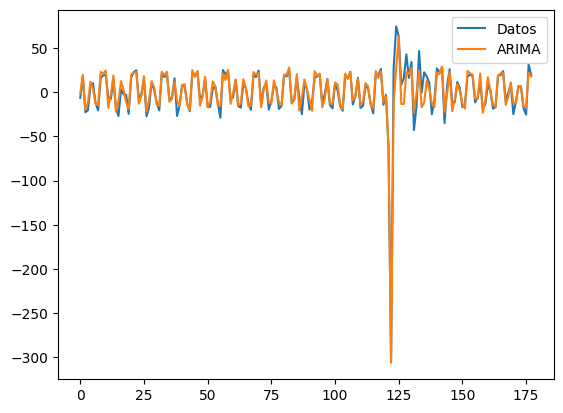

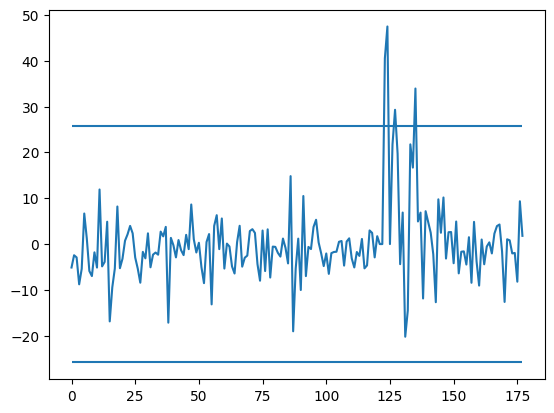

          beta_hat      desv    t_stad    p_val
const     -8.37979   8.14267  -1.02912  0.30499
feb        4.82481   8.40837   0.57381  0.56691
mar       21.32498   8.71829   2.44600  0.01554
abril     -7.01361   8.42324  -0.83265  0.40629
may       -4.26725   8.50595  -0.50168  0.61659
jun       18.08715   8.41448   2.14953  0.03310
jul       13.88235   8.41051   1.65059  0.10080
ago       -5.74271   8.44099  -0.68034  0.49728
sep       -7.65956   8.40021  -0.91183  0.36324
oct       29.17217   8.45914   3.44860  0.00072
nov       30.07832   8.44011   3.56374  0.00048
dic       33.63645   8.41523   3.99709  0.00010
IPC        0.21002   0.16290   1.28920  0.19920
T_Del      0.37442   0.17281   2.16663  0.03175
Esc       -5.33215   6.22372  -0.85675  0.39287
2020-03 -278.41237  10.01917 -27.78796  0.00000
2020-02  -72.12727   9.14155  -7.89005  0.00000
2020-08   55.30044   8.56492   6.45662  0.00000
2020-07   58.35805   8.94645   6.52304  0.00000


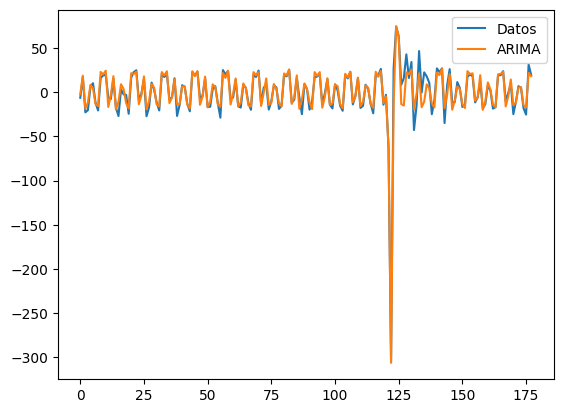

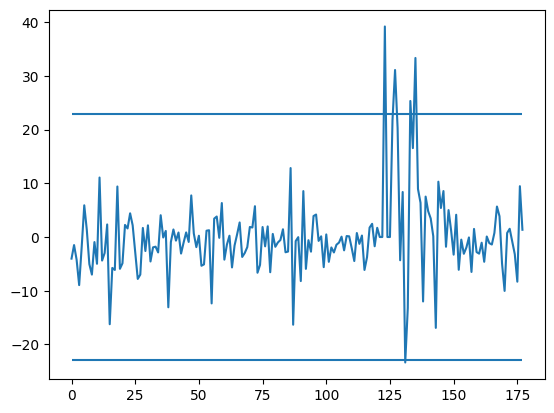

          beta_hat     desv    t_stad    p_val
const     -8.21083  7.48634  -1.09678  0.27441
feb        4.66147  7.73062   0.60299  0.54738
mar       20.43427  8.01714   2.54882  0.01176
abril     -6.90676  7.74425  -0.89186  0.37383
may       -7.62224  7.84415  -0.97171  0.33268
jun       18.11934  7.73618   2.34216  0.02042
jul       13.88077  7.73253   1.79511  0.07455
ago       -6.09243  7.76081  -0.78502  0.43361
sep       -7.68117  7.72305  -0.99458  0.32146
oct       28.74489  7.77763   3.69584  0.00030
nov       30.40999  7.75997   3.91883  0.00013
dic       33.76062  7.73690   4.36358  0.00002
IPC        0.19977  0.14978   1.33371  0.18422
T_Del      0.44197  0.15936   2.77348  0.00621
Esc       -5.53781  5.72214  -0.96779  0.33463
2020-03 -276.21410  9.22022 -29.95742  0.00000
2020-02  -71.73956  8.40493  -8.53542  0.00000
2020-08   54.55048  7.87567   6.92645  0.00000
2020-07   57.17893  8.22807   6.94925  0.00000
2020-06   42.26889  7.70382   5.48674  0.00000


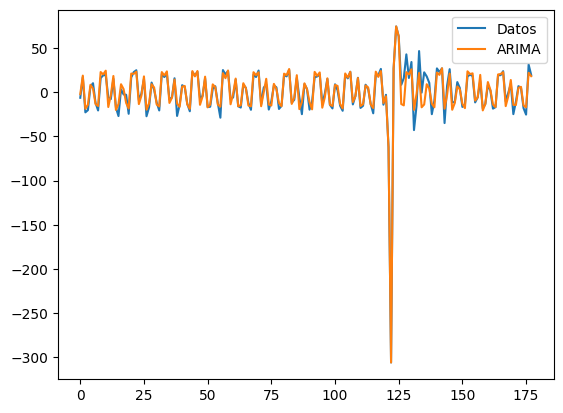

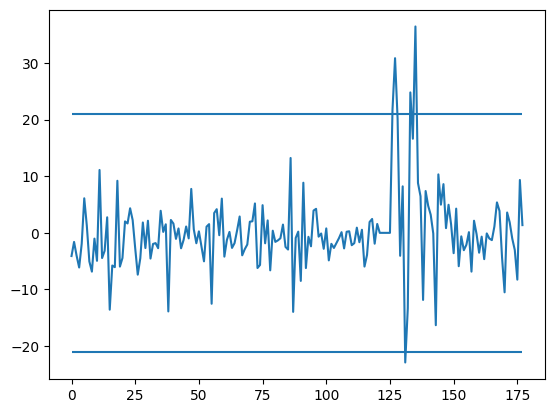

          beta_hat     desv    t_stad    p_val
const     -7.83440  6.84416  -1.14468  0.25408
feb        4.21621  7.06759   0.59656  0.55166
mar       19.71258  7.33019   2.68923  0.00794
abril     -7.05699  7.07966  -0.99680  0.32040
may      -11.42538  7.20232  -1.58635  0.11467
jun       17.95824  7.07229   2.53924  0.01208
jul       13.76982  7.06892   1.94794  0.05321
ago       -6.70344  7.09557  -0.94474  0.34625
sep       -7.98039  7.06043  -1.13030  0.26007
oct       28.22838  7.11071   3.96984  0.00011
nov       30.55819  7.09403   4.30759  0.00003
dic       33.85298  7.07291   4.78629  0.00000
IPC        0.07733  0.13863   0.55783  0.57775
T_Del      0.50258  0.14607   3.44064  0.00074
Esc       -5.83799  5.23131  -1.11597  0.26614
2020-03 -273.60950  8.44145 -32.41261  0.00000
2020-02  -73.72009  7.69155  -9.58456  0.00000
2020-08   53.55115  7.20192   7.43568  0.00000
2020-07   56.57506  7.52266   7.52061  0.00000
2020-06   45.47528  7.06538   6.43635  0.00000
2021-09   40.

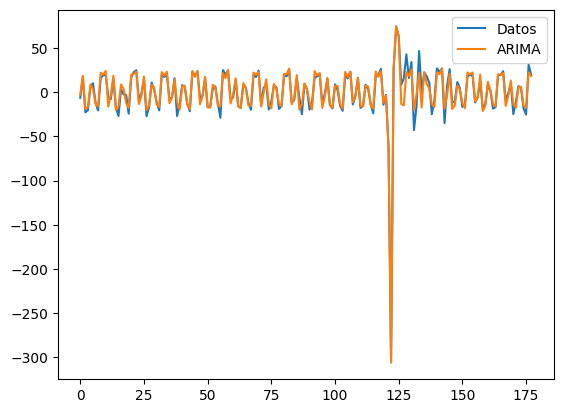

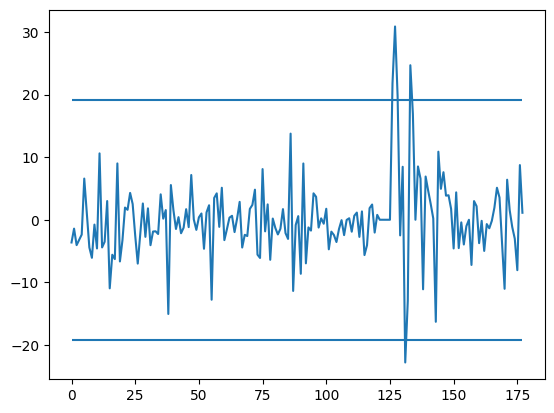

          beta_hat     desv    t_stad    p_val
const     -7.91350  6.35699  -1.24485  0.21505
feb        4.26381  6.56451   0.64952  0.51695
mar       20.57783  6.81053   3.02147  0.00294
abril     -7.24485  6.57582  -1.10174  0.27227
may      -11.05237  6.69004  -1.65206  0.10053
jun       17.86053  6.56889   2.71896  0.00729
jul       13.73242  6.56574   2.09153  0.03810
ago       -6.48002  6.59064  -0.98322  0.32702
sep      -10.28722  6.57345  -1.56497  0.11962
oct       28.58300  6.60492   4.32753  0.00003
nov       30.19322  6.58945   4.58205  0.00001
dic       33.72944  6.56949   5.13426  0.00000
IPC        0.04677  0.12890   0.36286  0.71720
T_Del      0.43905  0.13625   3.22244  0.00155
Esc       -5.68562  4.85902  -1.17011  0.24374
2020-03 -275.45264  7.84890 -35.09442  0.00000
2020-02  -74.91121  7.14786 -10.48023  0.00000
2020-08   54.14064  6.69026   8.09245  0.00000
2020-07   57.84523  6.99162   8.27351  0.00000
2020-06   45.26024  6.56258   6.89671  0.00000
2021-09   40.

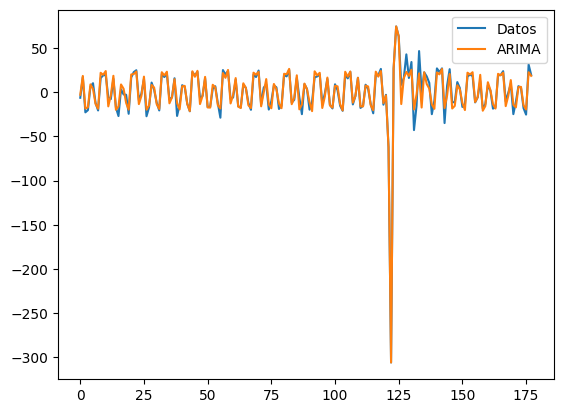

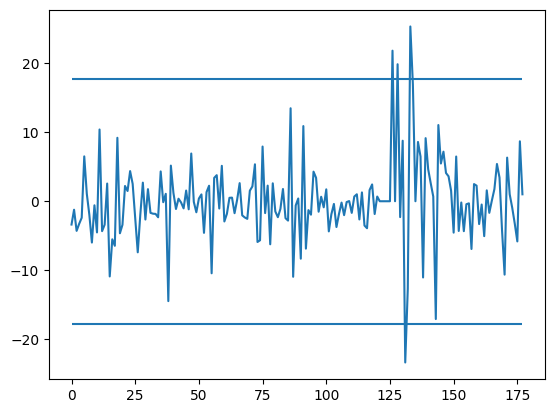

          beta_hat     desv    t_stad    p_val
const     -8.08306  5.99629  -1.34801  0.17962
feb        4.38798  6.19196   0.70866  0.47960
mar       20.06115  6.42498   3.12237  0.00214
abril     -7.54180  6.20292  -1.21585  0.22589
may      -10.33135  6.31234  -1.63669  0.10372
jun       17.71447  6.19613   2.85896  0.00484
jul       13.68150  6.19308   2.20916  0.02863
ago       -6.04689  6.21729  -0.97259  0.33227
sep      -10.42667  6.20041  -1.68161  0.09466
oct       29.22457  6.23165   4.68970  0.00001
nov       29.57175  6.21696   4.75663  0.00000
dic       33.51478  6.19679   5.40841  0.00000
IPC        0.00839  0.12188   0.06887  0.94518
T_Del      0.32733  0.13088   2.50099  0.01342
Esc       -5.40201  4.58366  -1.17854  0.24039
2020-03 -278.77914  7.44005 -37.47007  0.00000
2020-02  -74.66239  6.74237 -11.07361  0.00000
2020-08   55.22138  6.31507   8.74438  0.00000
2020-07   60.01703  6.61234   9.07652  0.00000
2020-06   44.86215  6.19072   7.24668  0.00000
2021-09   40.

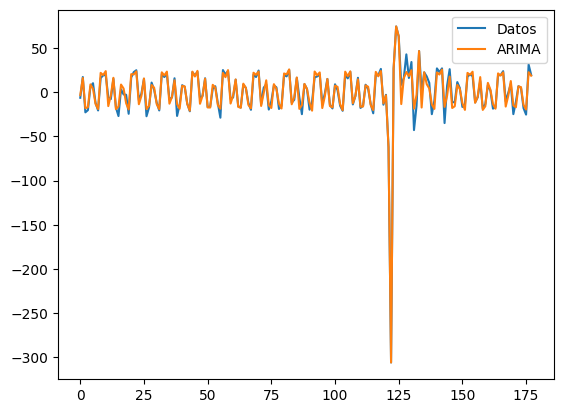

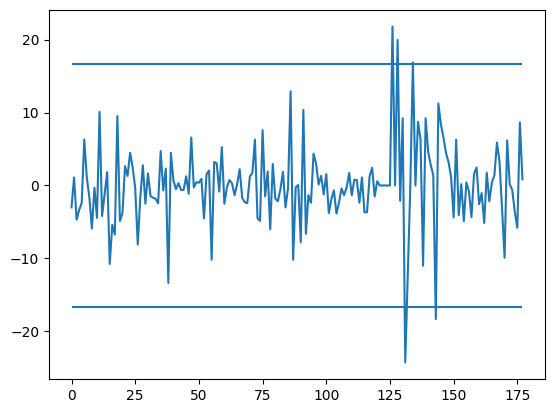

          beta_hat     desv    t_stad    p_val
const    -14.21252  5.74876  -2.47228  0.01451
feb       10.47350  5.92540   1.76756  0.07911
mar       27.39591  6.19682   4.42097  0.00002
abril     -1.85790  5.91829  -0.31392  0.75400
may       -3.67749  6.06112  -0.60673  0.54492
jun       23.54289  5.91810   3.97812  0.00011
jul       19.60141  5.91921   3.31149  0.00116
ago        0.33361  5.96180   0.05596  0.95545
sep       -4.59282  5.92225  -0.77552  0.43922
oct       35.80540  5.98421   5.98332  0.00000
nov       34.94661  5.91877   5.90437  0.00000
dic       39.27910  5.91601   6.63946  0.00000
IPC       -0.02916  0.11423  -0.25532  0.79882
T_Del      0.22067  0.12435   1.77450  0.07796
Esc        1.26646  4.50310   0.28124  0.77890
2020-03 -281.94984  6.98761 -40.34996  0.00000
2020-02  -76.30170  6.31345 -12.08557  0.00000
2020-08   56.25053  5.90862   9.52008  0.00000
2020-07   62.09413  6.19768  10.01893  0.00000
2020-06   44.48328  5.78903   7.68407  0.00000
2021-09   40.

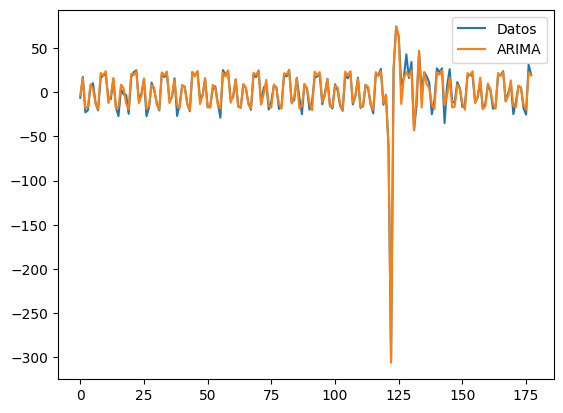

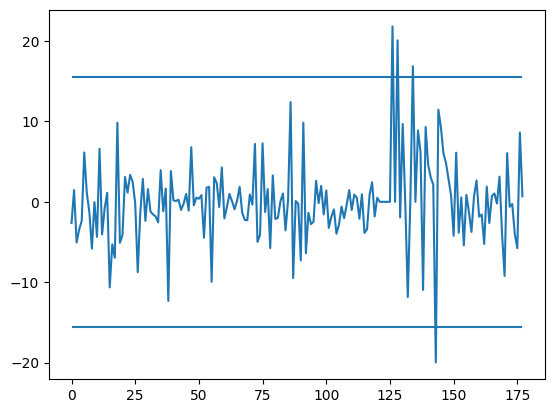

          beta_hat     desv    t_stad    p_val
const    -14.21307  5.44929  -2.60825  0.01000
feb       10.47293  5.61672   1.86460  0.06415
mar       27.40710  5.87400   4.66583  0.00001
abril     -1.86034  5.60998  -0.33161  0.74064
may       -3.67668  5.74537  -0.63994  0.52317
jun       23.54199  5.60980   4.19658  0.00005
jul       19.60200  5.61086   3.49359  0.00062
ago       -1.22382  5.66288  -0.21611  0.82919
sep       -4.59493  5.61374  -0.81852  0.41434
oct       35.80980  5.67247   6.31291  0.00000
nov       34.94338  5.61044   6.22828  0.00000
dic       39.27979  5.60782   7.00447  0.00000
IPC       -0.03071  0.10828  -0.28366  0.77705
T_Del      0.22001  0.11788   1.86643  0.06390
Esc        1.26912  4.26852   0.29732  0.76662
2020-03 -281.96205  6.62360 -42.56930  0.00000
2020-02  -76.33859  5.98457 -12.75590  0.00000
2020-08   56.25308  5.60082  10.04373  0.00000
2020-07   62.11223  5.87483  10.57261  0.00000
2020-06   44.48266  5.48746   8.10624  0.00000
2021-09   40.

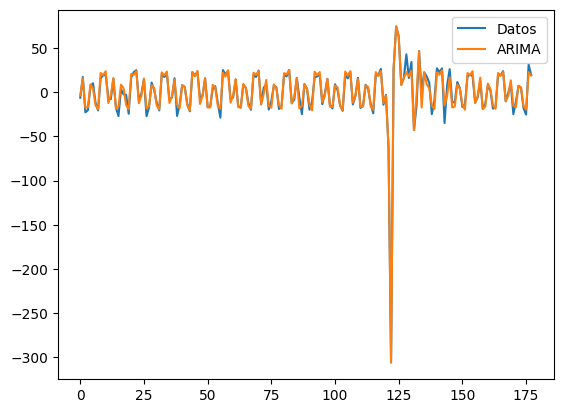

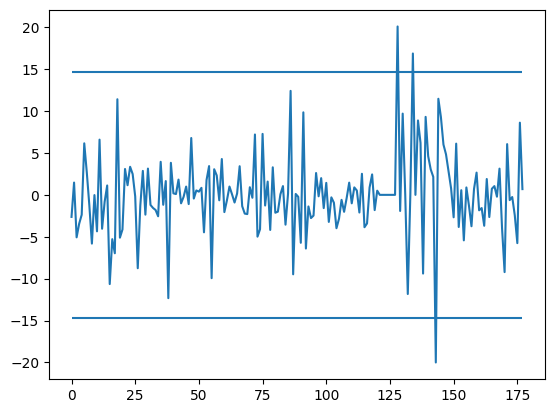

          beta_hat     desv    t_stad    p_val
const    -14.31610  5.17994  -2.76376  0.00642
feb       10.58419  5.33911   1.98239  0.04924
mar       27.67497  5.58397   4.95614  0.00000
abril     -1.83621  5.33263  -0.34433  0.73107
may       -3.41811  5.46168  -0.62583  0.53236
jun       23.58073  5.33247   4.42210  0.00002
jul       19.63996  5.33347   3.68240  0.00032
ago       -1.05738  5.38306  -0.19643  0.84454
sep       -4.53124  5.33623  -0.84915  0.39713
oct       34.53621  5.40070   6.39476  0.00000
nov       34.88792  5.33308   6.54179  0.00000
dic       39.26834  5.33058   7.36662  0.00000
IPC       -0.01249  0.10302  -0.12125  0.90365
T_Del      0.19999  0.11215   1.78317  0.07655
Esc        1.37003  4.05756   0.33765  0.73609
2020-03 -282.69836  6.29862 -44.88256  0.00000
2020-02  -76.13274  5.68892 -13.38264  0.00000
2020-08   56.51913  5.32431  10.61531  0.00000
2020-07   62.40082  5.58481  11.17331  0.00000
2020-06   44.37862  5.21623   8.50780  0.00000
2021-09   40.

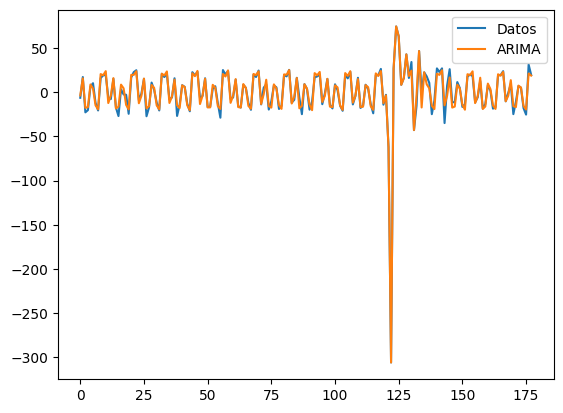

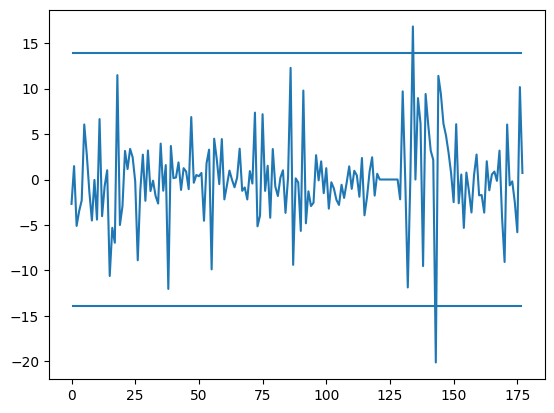

          beta_hat     desv    t_stad    p_val
const     -8.40383  5.01257  -1.67655  0.09570
feb        4.61550  5.16000   0.89448  0.37249
mar       23.16157  5.31840   4.35498  0.00002
abril     -8.25874  5.17866  -1.59476  0.11286
may       -8.75370  5.24070  -1.67033  0.09693
jun       17.32789  5.16914   3.35218  0.00101
jul       13.49836  5.16403   2.61392  0.00986
ago       -6.69034  5.18302  -1.29082  0.19874
sep      -10.78700  5.17270  -2.08537  0.03872
oct       29.13790  5.18786   5.61655  0.00000
nov       28.12095  5.19880   5.40913  0.00000
dic       32.95689  5.17064   6.37385  0.00000
IPC       -0.06498  0.09715  -0.66890  0.50458
T_Del      0.07827  0.10820   0.72338  0.47057
Esc       -1.67451  3.85590  -0.43427  0.66471
2020-03 -286.26290  5.94922 -48.11775  0.00000
2020-02  -78.19925  5.34770 -14.62296  0.00000
2020-08   57.66579  4.99402  11.54696  0.00000
2020-07   64.80978  5.25708  12.32809  0.00000
2020-06   43.95882  4.88764   8.99387  0.00000
2021-09   40.

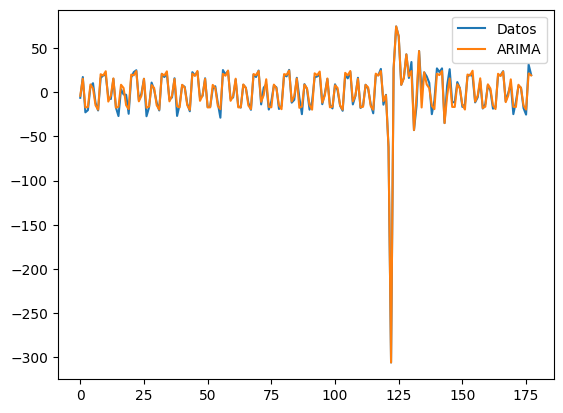

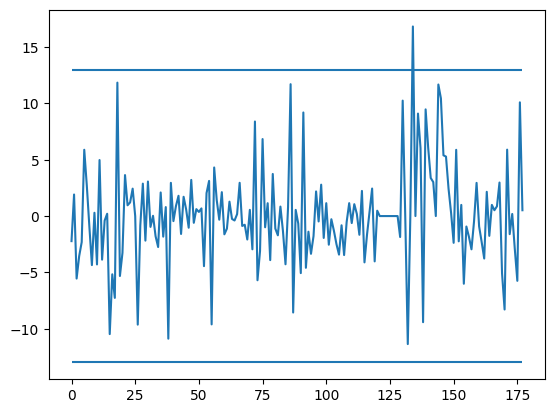

          beta_hat     desv    t_stad    p_val
const     -8.36067  4.79242  -1.74456  0.08311
feb        4.56462  4.93338   0.92525  0.35632
mar       23.08705  5.08484   4.54037  0.00001
abril     -9.57589  4.96272  -1.92957  0.05555
may       -8.86264  5.01060  -1.76878  0.07896
jun       17.30693  4.94210   3.50194  0.00061
jul       13.48329  4.93721   2.73095  0.00707
ago       -6.75817  4.95540  -1.36380  0.17467
sep      -10.82316  4.94551  -2.18848  0.03018
oct       29.08427  4.96002   5.86374  0.00000
nov       28.13179  4.97045   5.65981  0.00000
dic       32.96335  4.94353   6.66798  0.00000
IPC       -0.07853  0.09295  -0.84491  0.39951
T_Del      0.08442  0.10346   0.81600  0.41579
Esc       -1.70855  3.68655  -0.46346  0.64371
2020-03 -284.69546  5.70211 -49.92811  0.00000
2020-02  -78.42406  5.11314 -15.33774  0.00000
2020-08   57.56110  4.77475  12.05532  0.00000
2020-07   64.75295  5.02620  12.88308  0.00000
2020-06   44.00115  4.67298   9.41608  0.00000
2021-09   40.

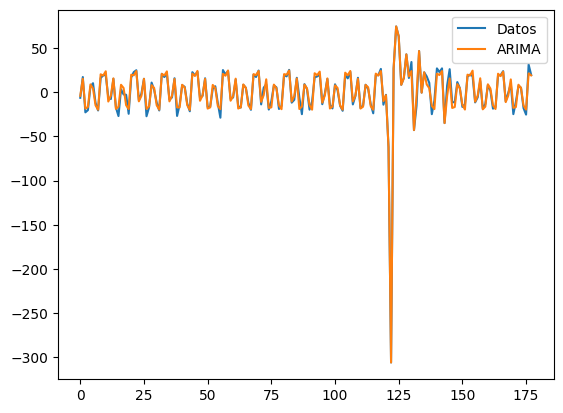

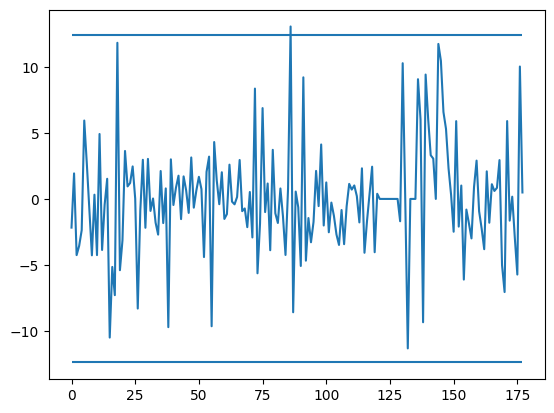

          beta_hat     desv    t_stad    p_val
const     -8.29351  4.65618  -1.78118  0.07692
feb        4.49917  4.79312   0.93867  0.34942
mar       22.61381  4.94252   4.57536  0.00001
abril    -10.58802  4.83229  -2.19110  0.03000
may       -9.18351  4.86917  -1.88605  0.06123
jun       17.36245  4.80159   3.61598  0.00041
jul       13.52020  4.79682   2.81857  0.00548
ago       -6.93646  4.81481  -1.44065  0.15178
sep      -10.79173  4.80488  -2.24599  0.02618
oct       28.86963  4.81944   5.99024  0.00000
nov       28.36969  4.82969   5.87402  0.00000
dic       33.07853  4.80308   6.88694  0.00000
IPC       -0.08735  0.09035  -0.96677  0.33523
T_Del      0.12536  0.10136   1.23678  0.21812
Esc       -1.84564  3.58198  -0.51526  0.60714
2020-03 -282.23743  5.59471 -50.44723  0.00000
2020-02  -78.26696  4.96798 -15.75427  0.00000
2020-08   57.09921  4.64128  12.30247  0.00000
2020-07   64.04898  4.88838  13.10229  0.00000
2020-06   44.17678  4.54043   9.72965  0.00000
2021-09   40.

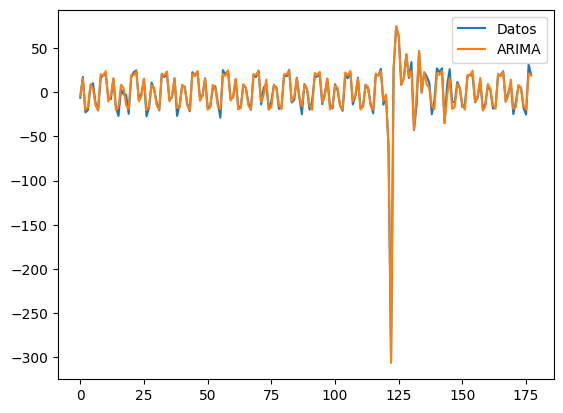

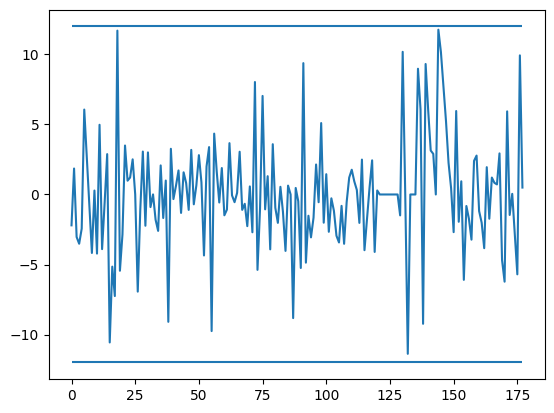

In [181]:
def outlayers(a, b, res, tabla, m, iter):
  x = np.copy(a)
  y1 = np.copy(b)
  n = len(x[:,0])
  for _ in range(iter):
    o = np.zeros((n,1))
    ir = np.argmax(np.abs(res))
    o[ir] = 1
    ind = list(tabla.index)
    ind.append(m[ir])
    m = np.delete(m,ir)
    x = np.append(x, o, axis = 1)
    A = np.transpose(x).dot(x)
    B = np.transpose(x).dot(y1)
    n_coef = len(A)
    coef_est = np.linalg.solve(A,B)
    y2 = np.dot(x,coef_est)
    res = y1 - y2

    i = np.linalg.inv(A)
    var = np.diag(np.var(res,ddof=n_coef)*i)
    desv = np.sqrt(var)

    grad_lib = n - n_coef
    t_stad = coef_est/desv

    p_val = t.cdf(-np.abs(t_stad), grad_lib) + 1 - t.cdf(np.abs(t_stad), grad_lib)


    tabla = pd.DataFrame(np.round(np.stack((coef_est, desv, t_stad, p_val), 1),5),
                        index = ind,
                        columns = ['beta_hat', 'desv', 't_stad', 'p_val'])
    print(tabla)

    plt.plot(y1, label='Datos')
    plt.plot(y2,label='ARIMA')

    plt.legend()
    plt.show()
    plt.plot(res)
    plt.hlines(3*np.std(res, ddof = 1), xmin=0, xmax = n-1)
    plt.hlines(-3*np.std(res, ddof = 1), xmin=0, xmax = n-1)
    plt.show()
  return x, tabla
x, tablao = outlayers(x,y1,res,tabla, m,14)

#Puliendo el Arima

In [182]:
# x = np.stack([np. ones(n-1), t12[1:, 2], t12[1:, 3], t12[1:, 4], t12[1:, 5], t12[1:, 6], t12[1:, 7], t12[1:, 8], t12[1:, 9], t12[1:, 10], t12[1:, 11],IPC, Tasa_delitos, Escolaridad, o], axis = 1)
# A = np.transpose(x).dot(x)
# B = np.transpose(x).dot(y1)
# n_coef = len(A)
# coef_est = np.linalg.solve(A,B)
# y2 = np.dot(x,coef_est)
# res = y1 - y2

# i = np.linalg.inv(A)
# var = np.diag(np.var(res,ddof=n_coef)*i)
# desv = np.sqrt(var)

# grad_lib = n - n_coef
# t_stad = coef_est/desv

# p_val = t.cdf(-np.abs(t_stad), grad_lib) + 1 - t.cdf(np.abs(t_stad), grad_lib)


# tabla = pd.DataFrame(np.round(np.stack((coef_est, desv, t_stad, p_val), 1),5),
#                      index = ["const", 'mar', 'abril', 'may', 'jun', 'jul', 'ago', 'sep', 'oct', 'nov', 'dic', 'IPC', 'T_Del', 'Esc', 'atipico'],
#                      columns = ['beta_hat', 'desv', 't_stad', 'p_val'])

# print(tabla)

# plt.plot(y1, label='Datos')
# plt.plot(y2,label='ARIMA')

# plt.legend()
# plt.show()

# plt.plot(res)
# plt.hlines(3*np.std(res, ddof = 1), xmin=0, xmax = n-1)
# plt.hlines(-3*np.std(res, ddof = 1), xmin=0, xmax = n-1)
# plt.show()

          beta_hat     desv    t_stad    p_val
const    -10.59764  1.29409  -8.18923  0.00000
feb        6.80317  1.72183   3.95112  0.00012
mar       24.96255  1.90569  13.09896  0.00000
abril     -8.29966  1.89972  -4.36888  0.00002
may       -6.85120  1.78989  -3.82772  0.00019
jun       19.65301  1.81019  10.85690  0.00000
jul       15.81276  1.78801   8.84375  0.00000
ago       -4.62001  1.71940  -2.68699  0.00802
sep       -8.49843  1.80589  -4.70595  0.00001
oct       31.18996  1.71271  18.21085  0.00000
nov       30.64010  1.97250  15.53365  0.00000
dic       35.36238  1.84556  19.16077  0.00000
IPC       -0.08629  0.09010  -0.95768  0.33975
T_Del      0.12084  0.10073   1.19963  0.23216
2020-03 -282.38910  5.57326 -50.66854  0.00000
2020-02  -78.28262  4.95571 -15.79644  0.00000
2020-08   57.15043  4.62884  12.34659  0.00000
2020-07   64.12635  4.87410  13.15656  0.00000
2020-06   44.15729  4.52914   9.74960  0.00000
2021-09   40.39016  4.57989   8.81903  0.00000
2021-01   35.

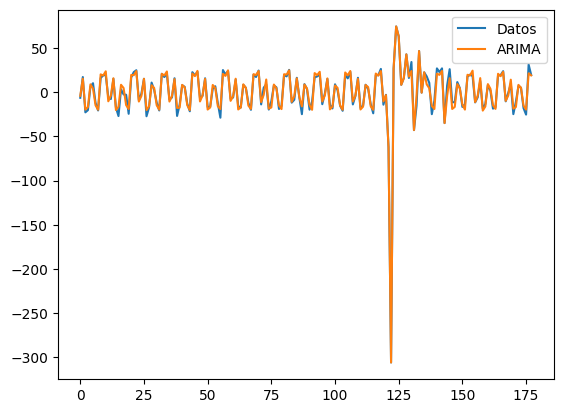

          beta_hat     desv    t_stad    p_val
const    -10.72847  1.28651  -8.33920  0.00000
feb        6.99133  1.71011   4.08822  0.00007
mar       24.82383  1.89966  13.06754  0.00000
abril     -8.10718  1.88854  -4.29282  0.00003
may       -6.55812  1.76305  -3.71976  0.00028
jun       19.77407  1.80527  10.95352  0.00000
jul       15.86904  1.78656   8.88246  0.00000
ago       -4.44782  1.70951  -2.60182  0.01019
sep       -8.29785  1.79321  -4.62737  0.00001
oct       31.21630  1.71202  18.23358  0.00000
nov       30.75529  1.96829  15.62541  0.00000
dic       35.35967  1.84505  19.16458  0.00000
T_Del      0.12657  0.10052   1.25907  0.20994
2020-03 -282.71123  5.56158 -50.83293  0.00000
2020-02  -76.48197  4.58393 -16.68482  0.00000
2020-08   57.33810  4.62342  12.40165  0.00000
2020-07   63.67689  4.85012  13.12894  0.00000
2020-06   44.06789  4.52694   9.73459  0.00000
2021-09   39.71406  4.52391   8.77871  0.00000
2021-01   34.89111  4.51885   7.72123  0.00000
2021-08   30.

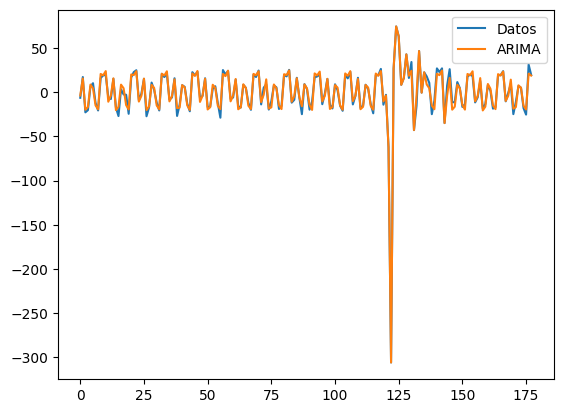

          beta_hat     desv    t_stad    p_val
const    -10.36813  1.25669  -8.25038  0.00000
feb        6.60793  1.68602   3.91925  0.00013
mar       25.78544  1.74271  14.79618  0.00000
abril     -8.92334  1.77722  -5.02095  0.00000
may       -6.19548  1.74271  -3.55509  0.00050
jun       19.04279  1.71257  11.11940  0.00000
jul       15.21465  1.71257   8.88408  0.00000
ago       -4.48223  1.71257  -2.61725  0.00975
sep       -8.98048  1.71257  -5.24385  0.00000
oct       31.33812  1.71257  18.29884  0.00000
nov       29.46982  1.68602  17.47892  0.00000
dic       34.48504  1.71257  20.13638  0.00000
2020-03 -286.78709  4.53104 -63.29381  0.00000
2020-02  -77.52157  4.51762 -17.15983  0.00000
2020-08   58.68782  4.50608  13.02414  0.00000
2020-07   65.96298  4.50608  14.63866  0.00000
2020-06   43.56027  4.51762   9.64231  0.00000
2021-09   39.25123  4.51762   8.68848  0.00000
2021-01   35.44448  4.50608   7.86592  0.00000
2021-08   31.36612  4.51762   6.94306  0.00000
2021-06  -32.

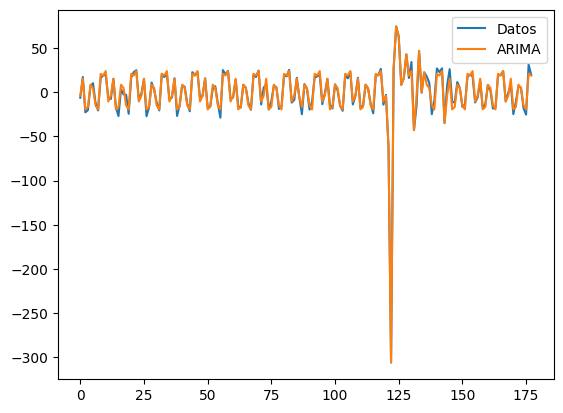

,beta_hat,desv,t_stad,p_val
const,-10.36813,1.25669,-8.25038,0.00000
feb,6.60793,1.68602,3.91925,0.00013
mar,25.78544,1.74271,14.79618,0.00000
abril,-8.92334,1.77722,-5.02095,0.00000
may,-6.19548,1.74271,-3.55509,0.00050
jun,19.04279,1.71257,11.11940,0.00000
jul,15.21465,1.71257,8.88408,0.00000
ago,-4.48223,1.71257,-2.61725,0.00975
sep,-8.98048,1.71257,-5.24385,0.00000
oct,31.33812,1.71257,18.29884,0.00000


In [183]:
def pulido(a, b, tabla, iter):
  x = np.copy(a)
  y1 = np.copy(b)
  for _ in range(iter):
    ns = tabla['p_val'].to_numpy()[1:]
    i = 1+np.argmax(ns)
    x = np.delete(x,i,1)
    ind = np.delete(tabla.index,i)
    A = np.transpose(x).dot(x)
    B = np.transpose(x).dot(y1)
    n_coef = len(A)
    coef_est = np.linalg.solve(A,B)
    y2 = np.dot(x,coef_est)
    res = y1 - y2

    i = np.linalg.inv(A)
    var = np.diag(np.var(res,ddof=n_coef)*i)
    desv = np.sqrt(var)

    grad_lib = n - n_coef
    t_stad = coef_est/desv

    p_val = t.cdf(-np.abs(t_stad), grad_lib) + 1 - t.cdf(np.abs(t_stad), grad_lib)


    tabla = pd.DataFrame(np.round(np.stack((coef_est, desv, t_stad, p_val), 1),5),
                        index = ind,
                        columns = ['beta_hat', 'desv', 't_stad', 'p_val'])
    print(tabla)

    plt.plot(y1, label='Datos')
    plt.plot(y2,label='ARIMA')

    plt.legend()
    plt.show()
  return tabla
pulido(x,y1,tablao,3)

Se volvio un AR

#ARIMAX

In [184]:
a = [1,2,3, 4, 5, 6]
print(a[:-2])
print(a[2:])

[1, 2, 3, 4]
[3, 4, 5, 6]


In [185]:
def lag(x,n):
  l = [x[n:]]
  l.append(x[:-n])
  return np.transpose(l)
lag(a,2)

array([[3, 1],
       [4, 2],
       [5, 3],
       [6, 4]])

In [186]:
def lags(x, n):
  l = [x[n:]]
  for i in range(1,n+1):
    l.append(x[n-i:-i])
  return np.transpose(l)

lags(a,1)

array([[2, 1],
       [3, 2],
       [4, 3],
       [5, 4],
       [6, 5]])

In [187]:
##Variable Exógena
y = 100 * np.diff(np.log(np.array(base[:, 0], float)))

IPC = 100 * np.diff(np.log(np.array(base[:, 1], float)))
Tasa_delitos = 100 * np.diff(np.log(np.array(base[:, 2], float)))
Escolaridad = 100 * np.diff(np.log(np.array(base[:, 3], float)))

x1 = np.stack((np.ones(n-1),IPC, Tasa_delitos, Escolaridad), axis = 1)
print(y1.shape)
#print(x1)


(178,)


In [188]:
yl = lags(y, 12)
IPC_l = lags(IPC, 12)
Tasa_delitos_l = lags(Tasa_delitos, 12)
Escolaridad_l = lag(Escolaridad, 12)

ind = []
for i in range(1,13):
  ind.append(f'y_lag{i}')

for i in range(13):
  ind.append(f'IPC_lag{i}')

for i in range(13):
  ind.append(f'Tasa_delitos_lag{i}')

ind.append('escol')
ind.append('escol_lag')

x = np.append(yl[:,1:], IPC_l,axis=1)
x = np.append(x,Tasa_delitos_l, axis = 1)
x = np.append(x,Escolaridad_l, axis = 1)

print(np.shape(x))

(166, 40)


                    beta_hat      desv   t_stad    p_val
y_lag1              -0.03643   0.08743 -0.41661  0.67761
y_lag2              -0.16949   0.08444 -2.00735  0.04665
y_lag3              -0.15172   0.07950 -1.90856  0.05838
y_lag4              -0.20076   0.07606 -2.63950  0.00925
y_lag5              -0.32372   0.07777 -4.16235  0.00005
y_lag6              -0.17537   0.07853 -2.23311  0.02714
y_lag7              -0.09783   0.08184 -1.19534  0.23399
y_lag8              -0.19847   0.08174 -2.42797  0.01646
y_lag9              -0.12873   0.08269 -1.55673  0.12181
y_lag10             -0.28537   0.07659 -3.72592  0.00028
y_lag11              0.05655   0.08053  0.70227  0.48369
y_lag12              0.25448   0.07784  3.26928  0.00136
IPC_lag0             0.95162   0.40282  2.36239  0.01954
IPC_lag1             2.25179   0.42069  5.35256  0.00000
IPC_lag2             0.48800   0.44775  1.08989  0.27765
IPC_lag3             0.05926   0.44123  0.13431  0.89335
IPC_lag4             0.35391   

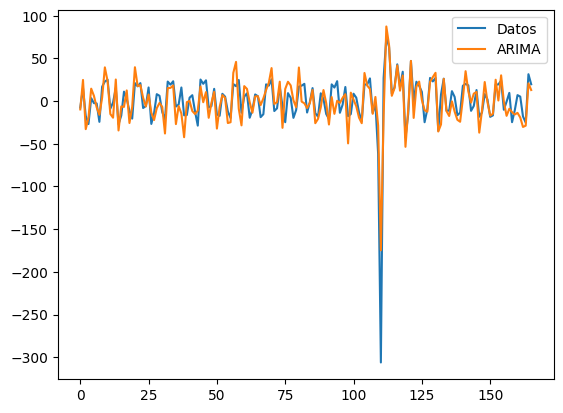

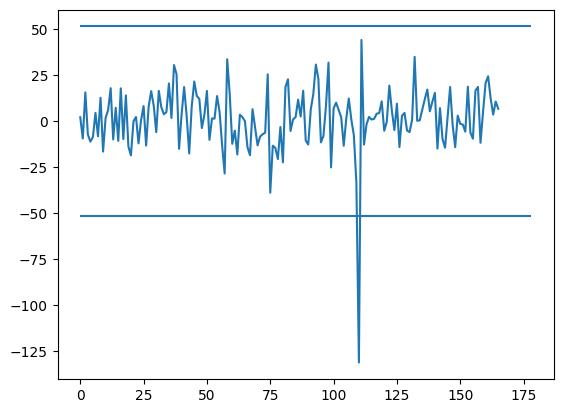

In [191]:
y1 = y[12:]
A = np.transpose(x).dot(x)
B = np.transpose(x).dot(y1)
n_coef = len(A)
coef_est = np.linalg.solve(A,B)
y2 = np.dot(x,coef_est)
res = y1 - y2

i = np.linalg.inv(A)
var = np.diag(np.var(res,ddof=n_coef)*i)
desv = np.sqrt(var)

grad_lib = n - n_coef
t_stad = coef_est/desv

p_val = t.cdf(-np.abs(t_stad), grad_lib) + 1 - t.cdf(np.abs(t_stad), grad_lib)


tabla = pd.DataFrame(np.round(np.stack((coef_est, desv, t_stad, p_val), 1),5),
                     index=ind,
                    columns = ['beta_hat', 'desv', 't_stad', 'p_val'])
print(tabla)

plt.plot(y1, label='Datos')
plt.plot(y2,label='ARIMA')

plt.legend()
plt.show()
plt.plot(res)
plt.hlines(3*np.std(res, ddof = 1), xmin=0, xmax = n-1)
plt.hlines(-3*np.std(res, ddof = 1), xmin=0, xmax = n-1)
plt.show()

                     beta_hat      desv    t_stad    p_val
y_lag1               -0.11449   0.04460  -2.56708  0.01143
y_lag2               -0.25431   0.04312  -5.89783  0.00000
y_lag3               -0.23500   0.04061  -5.78604  0.00000
y_lag4               -0.12352   0.03884  -3.17990  0.00186
y_lag5               -0.23890   0.03975  -6.00934  0.00000
y_lag6               -0.24044   0.04003  -6.00593  0.00000
y_lag7               -0.10641   0.04157  -2.55971  0.01167
y_lag8               -0.16649   0.04155  -4.00661  0.00011
y_lag9               -0.14681   0.04201  -3.49456  0.00066
y_lag10              -0.14647   0.03958  -3.70009  0.00032
y_lag11              -0.05068   0.04129  -1.22740  0.22198
y_lag12               0.14937   0.03992   3.74159  0.00028
IPC_lag0              1.28126   0.20533   6.23990  0.00000
IPC_lag1              0.66048   0.22955   2.87731  0.00472
IPC_lag2              0.44277   0.22743   1.94683  0.05380
IPC_lag3              0.47008   0.22515   2.08788  0.038

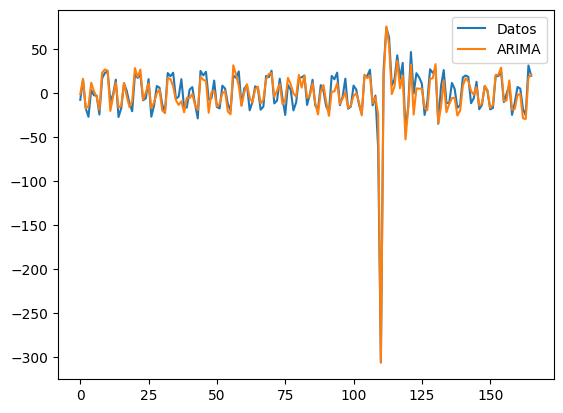

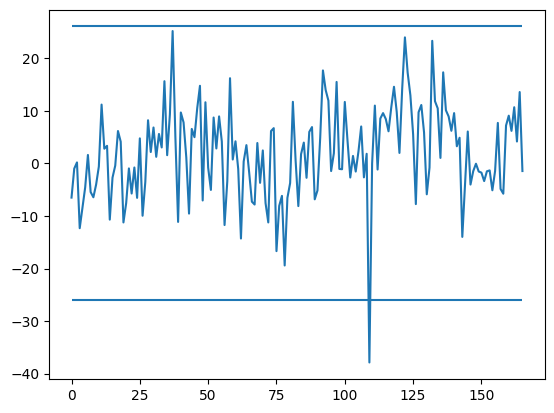

                     beta_hat      desv    t_stad    p_val
y_lag1               -0.11601   0.04059  -2.85804  0.00500
y_lag2               -0.27813   0.03954  -7.03331  0.00000
y_lag3               -0.22559   0.03701  -6.09467  0.00000
y_lag4               -0.10917   0.03547  -3.07752  0.00257
y_lag5               -0.24234   0.03619  -6.69706  0.00000
y_lag6               -0.25262   0.03652  -6.91733  0.00000
y_lag7               -0.10888   0.03784  -2.87776  0.00472
y_lag8               -0.18586   0.03802  -4.88778  0.00000
y_lag9               -0.12884   0.03841  -3.35414  0.00106
y_lag10              -0.16410   0.03621  -4.53234  0.00001
y_lag11              -0.06804   0.03775  -1.80263  0.07387
y_lag12               0.15033   0.03633   4.13763  0.00006
IPC_lag0              0.86834   0.20515   4.23264  0.00004
IPC_lag1              0.52490   0.21075   2.49060  0.01408
IPC_lag2              0.46929   0.20705   2.26654  0.02515
IPC_lag3              0.46181   0.20491   2.25373  0.025

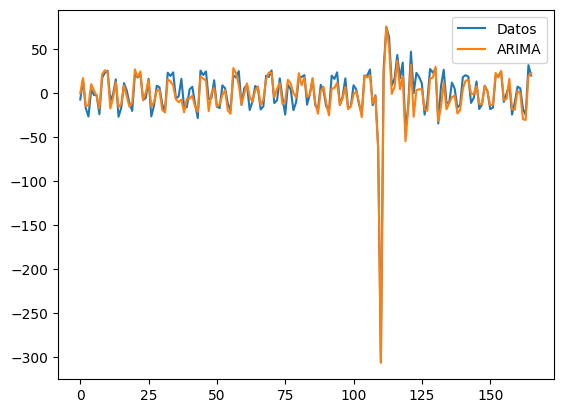

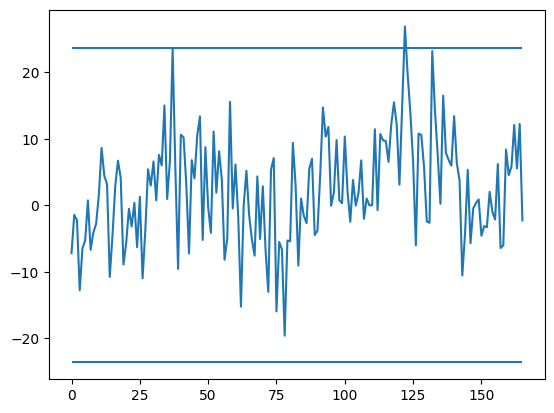

                     beta_hat      desv    t_stad    p_val
y_lag1               -0.14366   0.03087  -4.65368  0.00001
y_lag2               -0.20410   0.03083  -6.62049  0.00000
y_lag3               -0.21272   0.02807  -7.57840  0.00000
y_lag4               -0.11104   0.02688  -4.13157  0.00007
y_lag5               -0.22199   0.02749  -8.07591  0.00000
y_lag6               -0.19522   0.02824  -6.91367  0.00000
y_lag7               -0.11434   0.02867  -3.98816  0.00011
y_lag8               -0.15229   0.02900  -5.25218  0.00000
y_lag9               -0.11778   0.02912  -4.04479  0.00009
y_lag10              -0.08582   0.02849  -3.01239  0.00315
y_lag11              -0.20004   0.03140  -6.37067  0.00000
y_lag12               0.56508   0.04917  11.49120  0.00000
IPC_lag0              0.43592   0.16113   2.70543  0.00779
IPC_lag1              0.23150   0.16225   1.42686  0.15615
IPC_lag2              0.28460   0.15791   1.80233  0.07394
IPC_lag3              0.13009   0.15862   0.82011  0.413

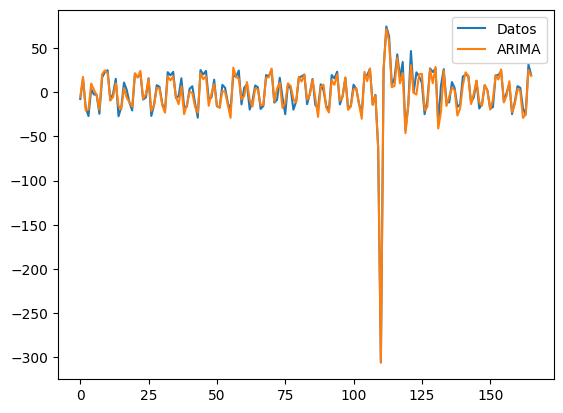

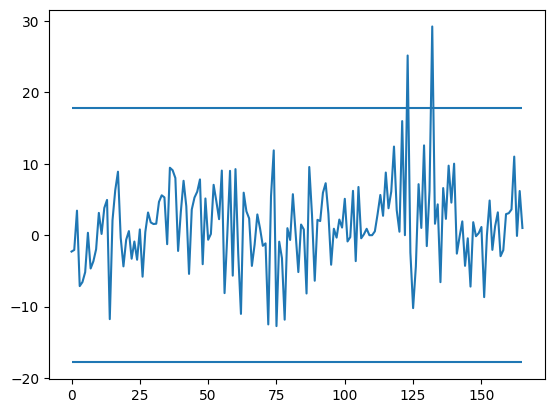

                     beta_hat      desv    t_stad    p_val
y_lag1               -0.14108   0.02823  -4.99829  0.00000
y_lag2               -0.20899   0.02820  -7.41089  0.00000
y_lag3               -0.21208   0.02566  -8.26415  0.00000
y_lag4               -0.12487   0.02471  -5.05330  0.00000
y_lag5               -0.22544   0.02514  -8.96817  0.00000
y_lag6               -0.18124   0.02595  -6.98391  0.00000
y_lag7               -0.12204   0.02625  -4.64886  0.00001
y_lag8               -0.15548   0.02652  -5.86373  0.00000
y_lag9               -0.12351   0.02664  -4.63530  0.00001
y_lag10              -0.08123   0.02606  -3.11705  0.00228
y_lag11              -0.20981   0.02877  -7.29350  0.00000
y_lag12               0.59969   0.04544  13.19868  0.00000
IPC_lag0              0.32986   0.14868   2.21861  0.02836
IPC_lag1              0.29140   0.14876   1.95883  0.05241
IPC_lag2              0.14575   0.14675   0.99318  0.32259
IPC_lag3              0.14494   0.14504   0.99932  0.319

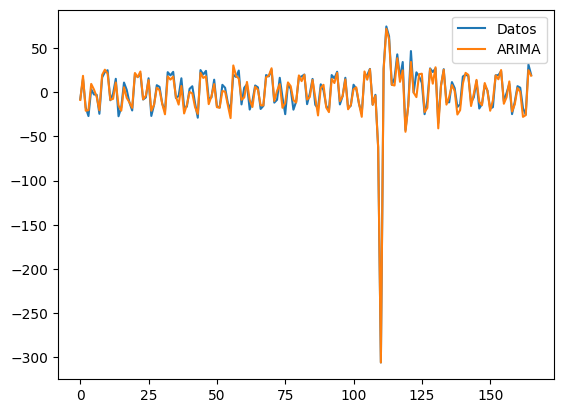

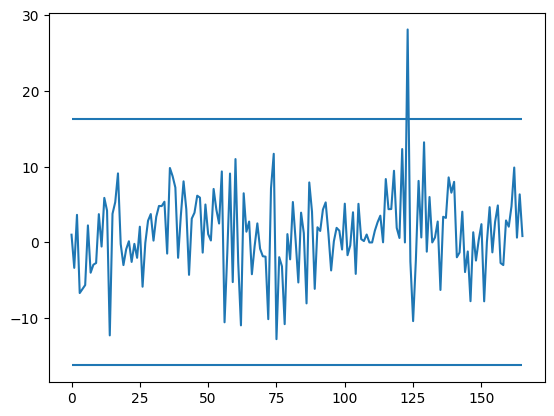

                     beta_hat      desv    t_stad    p_val
y_lag1               -0.11963   0.02442  -4.89845  0.00000
y_lag2               -0.19409   0.02429  -7.98942  0.00000
y_lag3               -0.19535   0.02215  -8.81767  0.00000
y_lag4               -0.10894   0.02133  -5.10759  0.00000
y_lag5               -0.23528   0.02162 -10.88491  0.00000
y_lag6               -0.16979   0.02233  -7.60468  0.00000
y_lag7               -0.12567   0.02253  -5.57874  0.00000
y_lag8               -0.17147   0.02287  -7.49763  0.00000
y_lag9               -0.12284   0.02286  -5.37385  0.00000
y_lag10              -0.08921   0.02239  -3.98474  0.00012
y_lag11              -0.23282   0.02491  -9.34565  0.00000
y_lag12               0.60396   0.03898  15.49229  0.00000
IPC_lag0              0.12434   0.13112   0.94831  0.34486
IPC_lag1              0.19096   0.12849   1.48622  0.13982
IPC_lag2             -0.03391   0.12867  -0.26350  0.79261
IPC_lag3              0.06834   0.12495   0.54694  0.585

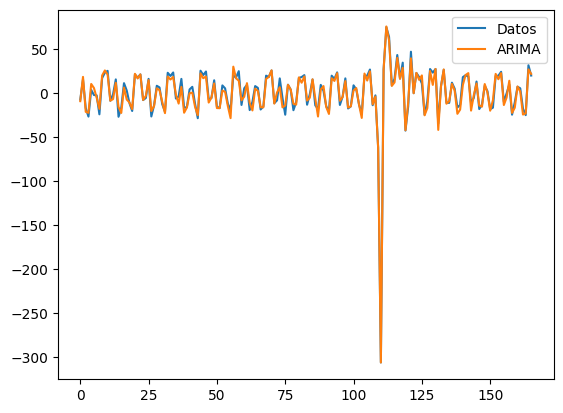

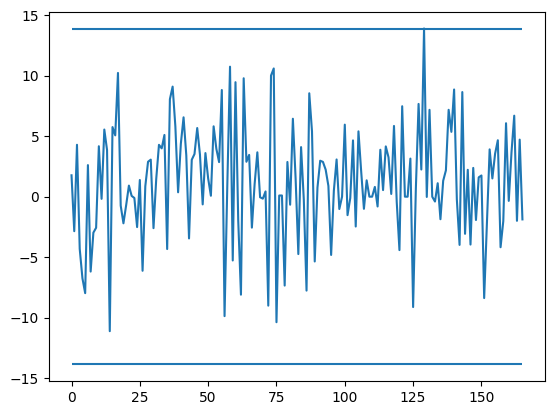

                     beta_hat      desv    t_stad    p_val
y_lag1               -0.12430   0.02373  -5.23753  0.00000
y_lag2               -0.19813   0.02359  -8.39744  0.00000
y_lag3               -0.19125   0.02153  -8.88491  0.00000
y_lag4               -0.11091   0.02069  -5.35951  0.00000
y_lag5               -0.23577   0.02096 -11.24790  0.00000
y_lag6               -0.17254   0.02167  -7.96212  0.00000
y_lag7               -0.12262   0.02187  -5.60711  0.00000
y_lag8               -0.17243   0.02218  -7.77414  0.00000
y_lag9               -0.11907   0.02220  -5.36318  0.00000
y_lag10              -0.08121   0.02187  -3.71413  0.00031
y_lag11              -0.23969   0.02426  -9.87918  0.00000
y_lag12               0.61559   0.03799  16.20225  0.00000
IPC_lag0              0.13025   0.12717   1.02425  0.30778
IPC_lag1              0.16970   0.12479   1.35987  0.17642
IPC_lag2             -0.02338   0.12483  -0.18729  0.85175
IPC_lag3              0.04670   0.12137   0.38474  0.701

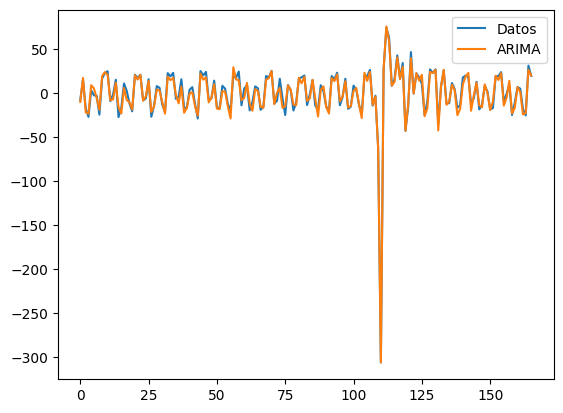

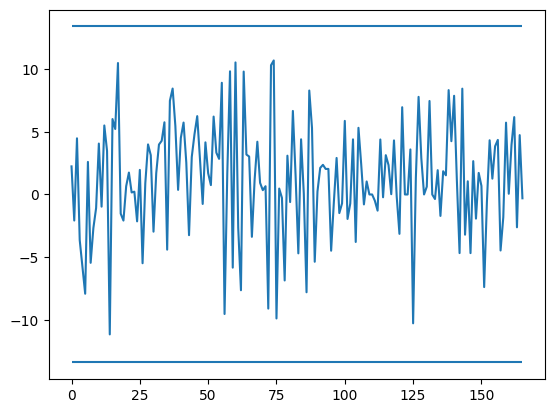

In [193]:
x1, tablao=outlayers(x, y1, res, tabla, np.copy(m), 6)

                     beta_hat      desv    t_stad    p_val
y_lag1               -0.12432   0.02361  -5.26493  0.00000
y_lag2               -0.19816   0.02346  -8.44585  0.00000
y_lag3               -0.19128   0.02139  -8.94265  0.00000
y_lag4               -0.11096   0.02051  -5.40885  0.00000
y_lag5               -0.23583   0.02073 -11.37394  0.00000
y_lag6               -0.17271   0.02039  -8.47223  0.00000
y_lag7               -0.12269   0.02157  -5.68802  0.00000
y_lag8               -0.17255   0.02152  -8.01638  0.00000
y_lag9               -0.11910   0.02206  -5.40008  0.00000
y_lag10              -0.08132   0.02127  -3.82397  0.00020
y_lag11              -0.23973   0.02410  -9.94747  0.00000
y_lag12               0.61539   0.03691  16.67297  0.00000
IPC_lag0              0.13047   0.12632   1.03289  0.30351
IPC_lag1              0.17020   0.12254   1.38893  0.16716
IPC_lag2             -0.02299   0.12326  -0.18648  0.85235
IPC_lag3              0.04713   0.11956   0.39417  0.694

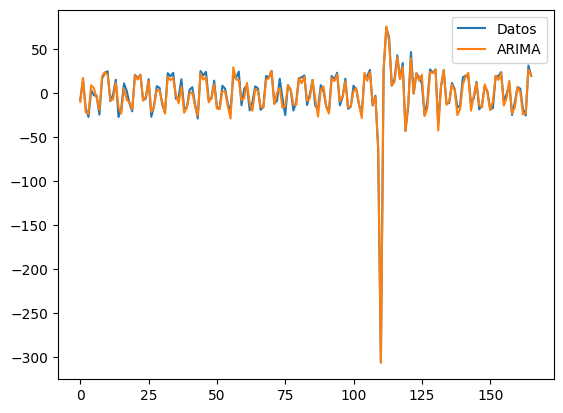

                     beta_hat      desv    t_stad    p_val
y_lag1               -0.12471   0.02215  -5.62989  0.00000
y_lag2               -0.19860   0.02159  -9.20036  0.00000
y_lag3               -0.19182   0.01833 -10.46593  0.00000
y_lag4               -0.11121   0.01978  -5.62143  0.00000
y_lag5               -0.23604   0.02021 -11.68139  0.00000
y_lag6               -0.17309   0.01879  -9.21425  0.00000
y_lag7               -0.12307   0.02003  -6.14588  0.00000
y_lag8               -0.17284   0.02063  -8.37742  0.00000
y_lag9               -0.11934   0.02146  -5.55996  0.00000
y_lag10              -0.08172   0.01962  -4.16415  0.00006
y_lag11              -0.23995   0.02359 -10.17016  0.00000
y_lag12               0.61499   0.03587  17.14588  0.00000
IPC_lag0              0.13061   0.12578   1.03837  0.30096
IPC_lag1              0.16980   0.12178   1.39434  0.16551
IPC_lag2             -0.02221   0.12177  -0.18243  0.85552
IPC_lag3              0.04775   0.11841   0.40328  0.687

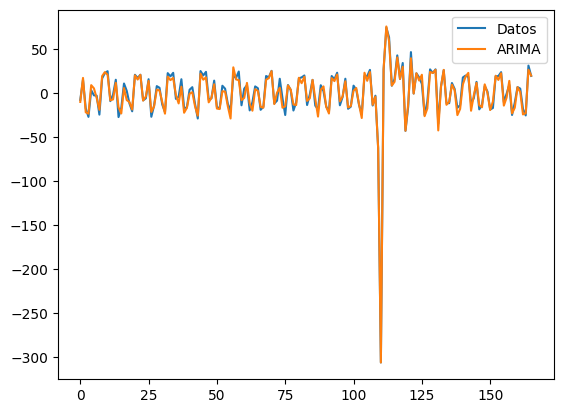

                     beta_hat      desv    t_stad    p_val
y_lag1               -0.12493   0.02197  -5.68720  0.00000
y_lag2               -0.19831   0.02132  -9.30091  0.00000
y_lag3               -0.19206   0.01812 -10.59992  0.00000
y_lag4               -0.11122   0.01970  -5.64464  0.00000
y_lag5               -0.23604   0.02013 -11.72845  0.00000
y_lag6               -0.17323   0.01867  -9.28074  0.00000
y_lag7               -0.12308   0.01995  -6.17083  0.00000
y_lag8               -0.17296   0.02052  -8.43070  0.00000
y_lag9               -0.11959   0.02124  -5.62934  0.00000
y_lag10              -0.08181   0.01953  -4.18987  0.00005
y_lag11              -0.24030   0.02327 -10.32847  0.00000
y_lag12               0.61418   0.03488  17.60709  0.00000
IPC_lag0              0.13147   0.12502   1.05160  0.29485
IPC_lag1              0.17033   0.12119   1.40554  0.16214
IPC_lag2             -0.02167   0.12118  -0.17880  0.85836
IPC_lag3              0.04828   0.11783   0.40970  0.682

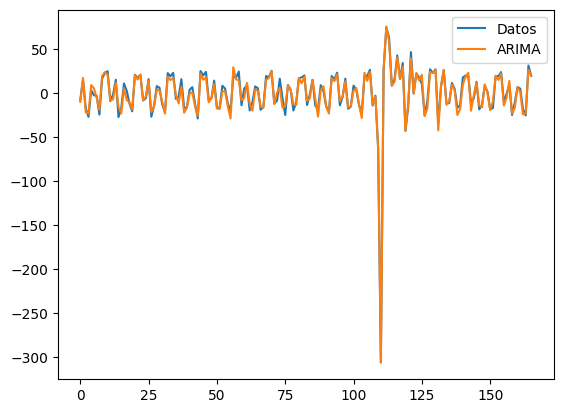

                     beta_hat      desv    t_stad    p_val
y_lag1               -0.12518   0.02176  -5.75214  0.00000
y_lag2               -0.19829   0.02125  -9.33358  0.00000
y_lag3               -0.19222   0.01799 -10.68796  0.00000
y_lag4               -0.11111   0.01961  -5.66687  0.00000
y_lag5               -0.23604   0.02005 -11.77042  0.00000
y_lag6               -0.17308   0.01854  -9.33334  0.00000
y_lag7               -0.12339   0.01966  -6.27540  0.00000
y_lag8               -0.17284   0.02041  -8.46802  0.00000
y_lag9               -0.11959   0.02117  -5.64966  0.00000
y_lag10              -0.08180   0.01946  -4.20440  0.00005
y_lag11              -0.24058   0.02303 -10.44746  0.00000
y_lag12               0.61502   0.03384  18.17385  0.00000
IPC_lag0              0.13003   0.12384   1.04999  0.29557
IPC_lag1              0.17100   0.12059   1.41798  0.15847
IPC_lag2             -0.01978   0.11943  -0.16558  0.86873
IPC_lag3              0.04788   0.11736   0.40802  0.683

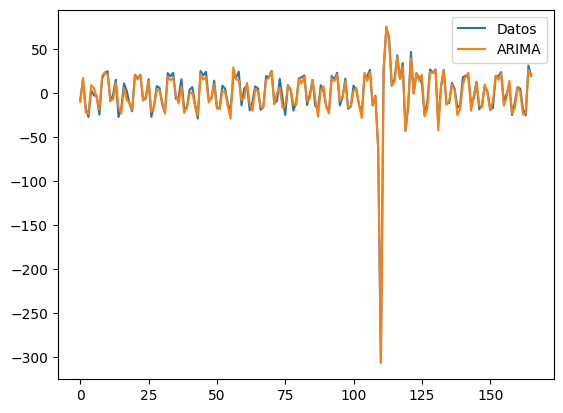

                     beta_hat      desv    t_stad    p_val
y_lag1               -0.12619   0.02081  -6.06321  0.00000
y_lag2               -0.19880   0.02095  -9.49111  0.00000
y_lag3               -0.19270   0.01769 -10.89194  0.00000
y_lag4               -0.11104   0.01953  -5.68498  0.00000
y_lag5               -0.23631   0.01992 -11.86347  0.00000
y_lag6               -0.17367   0.01813  -9.57745  0.00000
y_lag7               -0.12345   0.01959  -6.30272  0.00000
y_lag8               -0.17293   0.02033  -8.50619  0.00000
y_lag9               -0.11944   0.02107  -5.66814  0.00000
y_lag10              -0.08150   0.01930  -4.22283  0.00004
y_lag11              -0.24064   0.02294 -10.48899  0.00000
y_lag12               0.61466   0.03365  18.26614  0.00000
IPC_lag0              0.13194   0.12286   1.07390  0.28474
IPC_lag1              0.17435   0.11845   1.47186  0.14334
IPC_lag3              0.05160   0.11477   0.44963  0.65368
IPC_lag4              0.07477   0.11200   0.66761  0.505

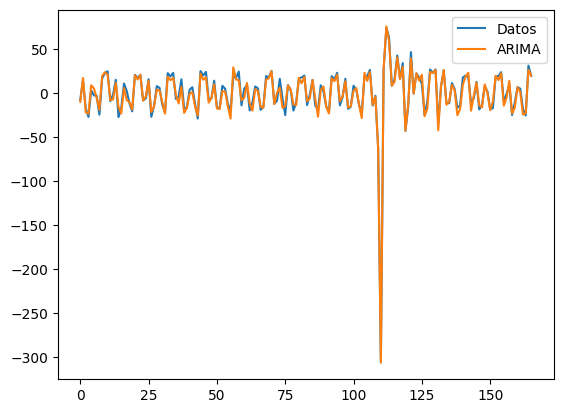

                     beta_hat      desv    t_stad    p_val
y_lag1               -0.12552   0.02065  -6.07757  0.00000
y_lag2               -0.19847   0.02086  -9.51484  0.00000
y_lag3               -0.19274   0.01764 -10.92764  0.00000
y_lag4               -0.10822   0.01757  -6.15776  0.00000
y_lag5               -0.23508   0.01952 -12.04229  0.00000
y_lag6               -0.17374   0.01808  -9.61135  0.00000
y_lag7               -0.12206   0.01908  -6.39632  0.00000
y_lag8               -0.17151   0.01982  -8.65293  0.00000
y_lag9               -0.11777   0.02041  -5.76969  0.00000
y_lag10              -0.08107   0.01920  -4.22273  0.00004
y_lag11              -0.23916   0.02245 -10.65471  0.00000
y_lag12               0.61468   0.03355  18.32258  0.00000
IPC_lag0              0.13265   0.12247   1.08310  0.28064
IPC_lag1              0.16866   0.11687   1.44308  0.15125
IPC_lag3              0.05045   0.11437   0.44113  0.65981
IPC_lag4              0.07053   0.11094   0.63574  0.525

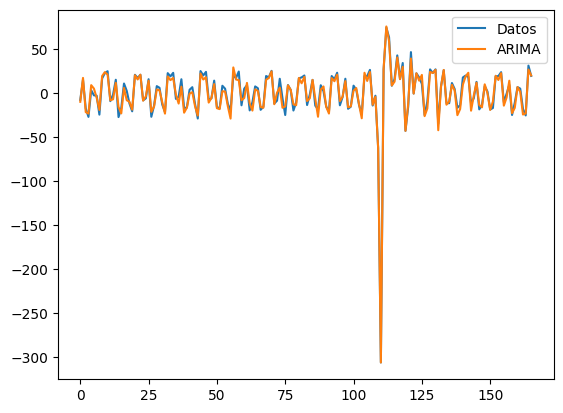

                     beta_hat      desv    t_stad    p_val
y_lag1               -0.12610   0.02054  -6.13897  0.00000
y_lag2               -0.19584   0.01992  -9.83316  0.00000
y_lag3               -0.19168   0.01741 -11.00737  0.00000
y_lag4               -0.10683   0.01723  -6.19997  0.00000
y_lag5               -0.23513   0.01945 -12.08582  0.00000
y_lag6               -0.17286   0.01790  -9.65438  0.00000
y_lag7               -0.12085   0.01882  -6.42154  0.00000
y_lag8               -0.17097   0.01972  -8.67178  0.00000
y_lag9               -0.11657   0.02016  -5.78190  0.00000
y_lag10              -0.08101   0.01913  -4.23455  0.00004
y_lag11              -0.24050   0.02217 -10.84961  0.00000
y_lag12               0.61806   0.03255  18.98684  0.00000
IPC_lag0              0.12935   0.12182   1.06177  0.29017
IPC_lag1              0.16726   0.11643   1.43655  0.15308
IPC_lag4              0.06053   0.10823   0.55925  0.57689
IPC_lag5             -0.22483   0.11008  -2.04252  0.042

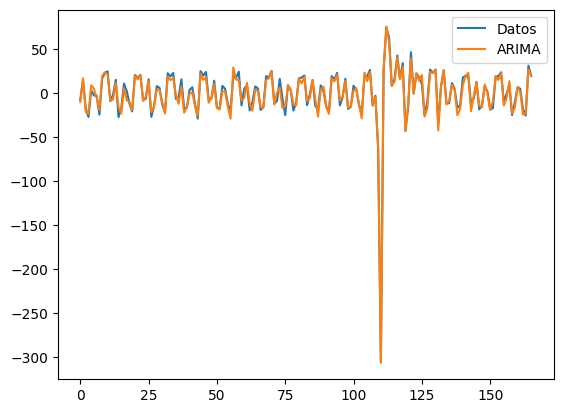

                     beta_hat      desv    t_stad    p_val
y_lag1               -0.12581   0.02045  -6.15151  0.00000
y_lag2               -0.19550   0.01983  -9.86068  0.00000
y_lag3               -0.18853   0.01641 -11.48718  0.00000
y_lag4               -0.10584   0.01707  -6.20023  0.00000
y_lag5               -0.23324   0.01908 -12.22221  0.00000
y_lag6               -0.17291   0.01783  -9.69652  0.00000
y_lag7               -0.11980   0.01865  -6.42359  0.00000
y_lag8               -0.16937   0.01943  -8.71758  0.00000
y_lag9               -0.11594   0.02005  -5.78292  0.00000
y_lag10              -0.07957   0.01888  -4.21450  0.00004
y_lag11              -0.24139   0.02202 -10.96200  0.00000
y_lag12               0.61903   0.03237  19.12114  0.00000
IPC_lag0              0.12392   0.12094   1.02459  0.30731
IPC_lag1              0.16527   0.11591   1.42586  0.15612
IPC_lag5             -0.23580   0.10788  -2.18589  0.03047
IPC_lag6              0.21517   0.11129   1.93342  0.055

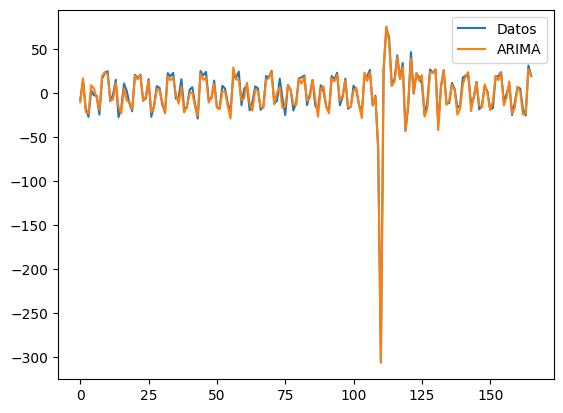

                     beta_hat      desv    t_stad    p_val
y_lag1               -0.12612   0.02036  -6.19352  0.00000
y_lag2               -0.19373   0.01963  -9.87082  0.00000
y_lag3               -0.18820   0.01634 -11.51796  0.00000
y_lag4               -0.10562   0.01700  -6.21397  0.00000
y_lag5               -0.23234   0.01897 -12.24560  0.00000
y_lag6               -0.17298   0.01776  -9.74040  0.00000
y_lag7               -0.11542   0.01779  -6.48710  0.00000
y_lag8               -0.16792   0.01927  -8.71496  0.00000
y_lag9               -0.11353   0.01975  -5.74851  0.00000
y_lag10              -0.08006   0.01879  -4.26030  0.00004
y_lag11              -0.24020   0.02188 -10.97696  0.00000
y_lag12               0.62109   0.03214  19.32239  0.00000
IPC_lag0              0.13509   0.11968   1.12880  0.26089
IPC_lag1              0.16929   0.11533   1.46787  0.14435
IPC_lag5             -0.23615   0.10743  -2.19812  0.02956
IPC_lag6              0.21257   0.11079   1.91875  0.057

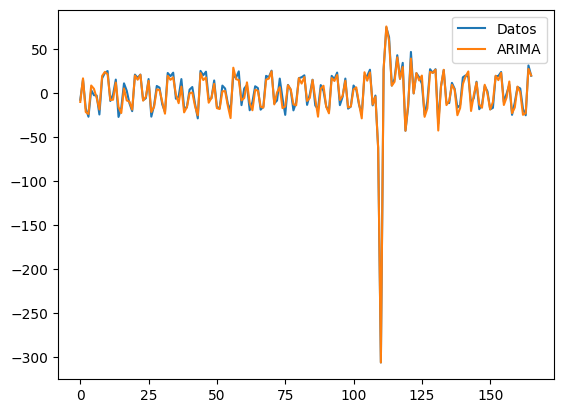

                     beta_hat      desv    t_stad    p_val
y_lag1               -0.12233   0.02001  -6.11312  0.00000
y_lag2               -0.19851   0.01908 -10.40303  0.00000
y_lag3               -0.19228   0.01586 -12.11989  0.00000
y_lag4               -0.10708   0.01690  -6.33703  0.00000
y_lag5               -0.23689   0.01846 -12.83323  0.00000
y_lag6               -0.17503   0.01761  -9.93867  0.00000
y_lag7               -0.11707   0.01768  -6.62165  0.00000
y_lag8               -0.17351   0.01853  -9.36485  0.00000
y_lag9               -0.11731   0.01939  -6.04912  0.00000
y_lag10              -0.08108   0.01872  -4.33201  0.00003
y_lag11              -0.24574   0.02123 -11.57585  0.00000
y_lag12               0.61330   0.03126  19.62038  0.00000
IPC_lag0              0.13870   0.11930   1.16262  0.24692
IPC_lag1              0.15809   0.11456   1.38001  0.16974
IPC_lag5             -0.23025   0.10700  -2.15185  0.03309
IPC_lag6              0.21876   0.11034   1.98263  0.049

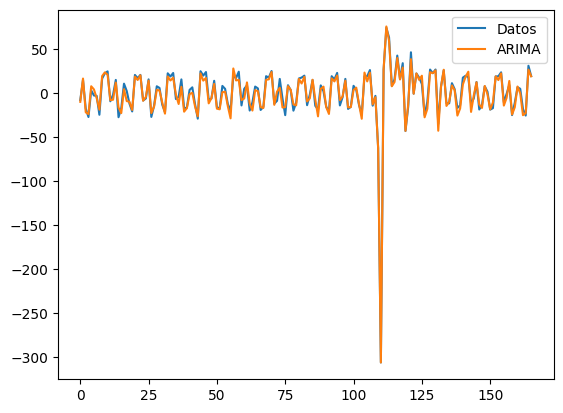

                     beta_hat      desv    t_stad    p_val
y_lag1               -0.12318   0.02004  -6.14585  0.00000
y_lag2               -0.19870   0.01912 -10.39068  0.00000
y_lag3               -0.19192   0.01590 -12.07264  0.00000
y_lag4               -0.10794   0.01692  -6.37953  0.00000
y_lag5               -0.23867   0.01843 -12.94785  0.00000
y_lag6               -0.17679   0.01758 -10.05659  0.00000
y_lag7               -0.11731   0.01772  -6.62067  0.00000
y_lag8               -0.17460   0.01854  -9.41518  0.00000
y_lag9               -0.12389   0.01854  -6.68336  0.00000
y_lag10              -0.08376   0.01861  -4.50136  0.00001
y_lag11              -0.24975   0.02098 -11.90573  0.00000
y_lag12               0.61321   0.03133  19.57419  0.00000
IPC_lag0              0.14035   0.11956   1.17395  0.24235
IPC_lag1              0.16325   0.11472   1.42308  0.15687
IPC_lag5             -0.22522   0.10714  -2.10204  0.03729
IPC_lag6              0.23424   0.10973   2.13483  0.034

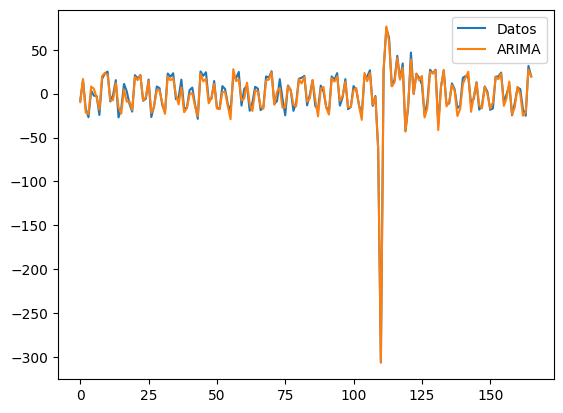

                     beta_hat      desv    t_stad    p_val
y_lag1               -0.12397   0.02005  -6.18305  0.00000
y_lag2               -0.20105   0.01904 -10.56096  0.00000
y_lag3               -0.19161   0.01591 -12.04295  0.00000
y_lag4               -0.10668   0.01690  -6.31160  0.00000
y_lag5               -0.24079   0.01836 -13.11316  0.00000
y_lag6               -0.17611   0.01759 -10.01331  0.00000
y_lag7               -0.11988   0.01760  -6.81133  0.00000
y_lag8               -0.17884   0.01821  -9.82310  0.00000
y_lag9               -0.12202   0.01849  -6.60021  0.00000
y_lag10              -0.08503   0.01859  -4.57274  0.00001
y_lag11              -0.25684   0.02011 -12.77185  0.00000
y_lag12               0.62139   0.03057  20.32444  0.00000
IPC_lag1              0.14385   0.11363   1.26589  0.20758
IPC_lag5             -0.23491   0.10693  -2.19682  0.02962
IPC_lag6              0.21485   0.10858   1.97870  0.04974
IPC_lag9             -0.17820   0.10630  -1.67647  0.095

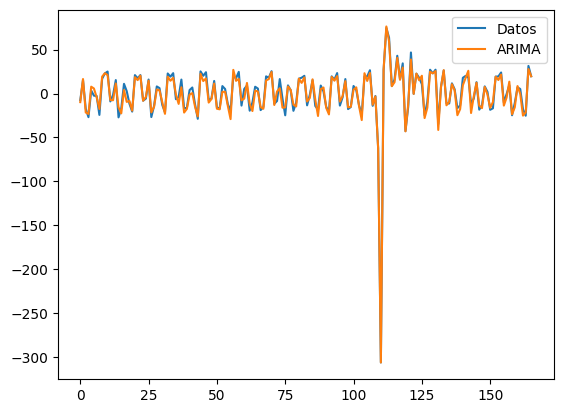

                     beta_hat      desv    t_stad    p_val
y_lag1               -0.11842   0.01956  -6.05463  0.00000
y_lag2               -0.19573   0.01856 -10.54516  0.00000
y_lag3               -0.19117   0.01593 -12.00168  0.00000
y_lag4               -0.10561   0.01690  -6.24811  0.00000
y_lag5               -0.23826   0.01827 -13.03994  0.00000
y_lag6               -0.16753   0.01616 -10.36985  0.00000
y_lag7               -0.11864   0.01760  -6.74252  0.00000
y_lag8               -0.17865   0.01823  -9.79920  0.00000
y_lag9               -0.11684   0.01802  -6.48298  0.00000
y_lag10              -0.08242   0.01850  -4.45559  0.00002
y_lag11              -0.25761   0.02013 -12.79892  0.00000
y_lag12               0.62670   0.03031  20.67861  0.00000
IPC_lag1              0.15241   0.11358   1.34188  0.18172
IPC_lag5             -0.25195   0.10617  -2.37297  0.01895
IPC_lag6              0.20040   0.10809   1.85394  0.06576
IPC_lag9             -0.17676   0.10644  -1.66065  0.098

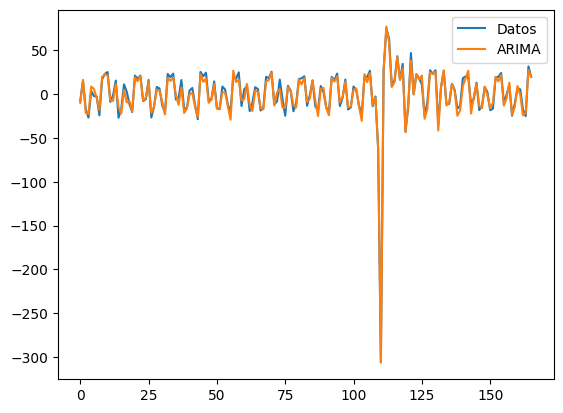

                     beta_hat      desv    t_stad    p_val
y_lag1               -0.11838   0.01962  -6.03277  0.00000
y_lag2               -0.19086   0.01818 -10.50054  0.00000
y_lag3               -0.19109   0.01598 -11.95622  0.00000
y_lag4               -0.10574   0.01696  -6.23468  0.00000
y_lag5               -0.23623   0.01825 -12.94069  0.00000
y_lag6               -0.16950   0.01613 -10.51082  0.00000
y_lag7               -0.11183   0.01672  -6.68860  0.00000
y_lag8               -0.17854   0.01829  -9.76065  0.00000
y_lag9               -0.11884   0.01801  -6.60010  0.00000
y_lag10              -0.07814   0.01822  -4.28994  0.00003
y_lag11              -0.25916   0.02015 -12.85879  0.00000
y_lag12               0.63280   0.02998  21.10646  0.00000
IPC_lag1              0.13289   0.11280   1.17819  0.24063
IPC_lag5             -0.25105   0.10653  -2.35664  0.01976
IPC_lag6              0.19690   0.10842   1.81614  0.07139
IPC_lag9             -0.15999   0.10588  -1.51105  0.132

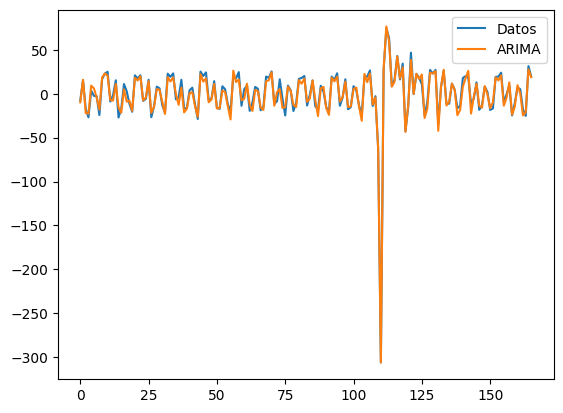

                     beta_hat      desv    t_stad    p_val
y_lag1               -0.10821   0.01683  -6.42820  0.00000
y_lag2               -0.18763   0.01781 -10.53698  0.00000
y_lag3               -0.19073   0.01589 -11.99930  0.00000
y_lag4               -0.10301   0.01666  -6.18254  0.00000
y_lag5               -0.23544   0.01814 -12.97706  0.00000
y_lag6               -0.16846   0.01601 -10.52210  0.00000
y_lag7               -0.11134   0.01662  -6.69720  0.00000
y_lag8               -0.17650   0.01809  -9.75796  0.00000
y_lag9               -0.11962   0.01790  -6.68409  0.00000
y_lag10              -0.07772   0.01812  -4.29042  0.00003
y_lag11              -0.25831   0.02003 -12.89513  0.00000
y_lag12               0.62836   0.02951  21.29262  0.00000
IPC_lag1              0.12753   0.11208   1.13777  0.25706
IPC_lag5             -0.26295   0.10534  -2.49623  0.01365
IPC_lag6              0.20812   0.10729   1.93973  0.05431
IPC_lag9             -0.15955   0.10533  -1.51488  0.131

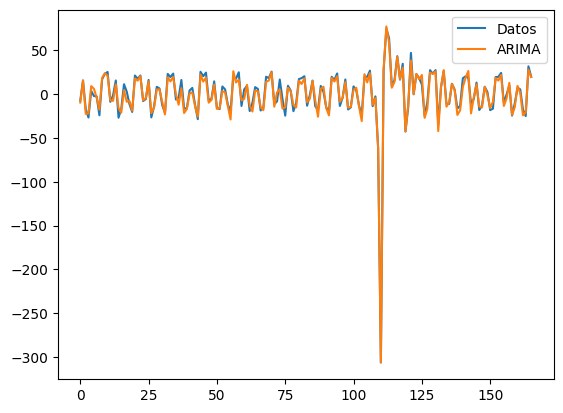

                     beta_hat      desv    t_stad    p_val
y_lag1               -0.10912   0.01683  -6.48235  0.00000
y_lag2               -0.18764   0.01783 -10.52587  0.00000
y_lag3               -0.19202   0.01587 -12.09790  0.00000
y_lag4               -0.10190   0.01665  -6.11945  0.00000
y_lag5               -0.23267   0.01800 -12.92703  0.00000
y_lag6               -0.16910   0.01602 -10.55647  0.00000
y_lag7               -0.11223   0.01662  -6.75048  0.00000
y_lag8               -0.17740   0.01809  -9.80608  0.00000
y_lag9               -0.12044   0.01790  -6.72771  0.00000
y_lag10              -0.07522   0.01800  -4.17844  0.00005
y_lag11              -0.26085   0.01993 -13.08883  0.00000
y_lag12               0.62949   0.02953  21.31885  0.00000
IPC_lag5             -0.27654   0.10478  -2.63933  0.00919
IPC_lag6              0.19751   0.10701   1.84572  0.06692
IPC_lag9             -0.15241   0.10526  -1.44803  0.14971
IPC_lag11             0.45329   0.10421   4.34986  0.000

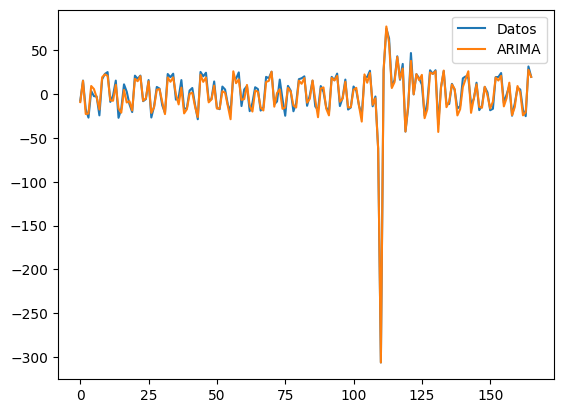

                     beta_hat      desv    t_stad    p_val
y_lag1               -0.11103   0.01686  -6.58509  0.00000
y_lag2               -0.18636   0.01789 -10.41415  0.00000
y_lag3               -0.19239   0.01595 -12.05936  0.00000
y_lag4               -0.10383   0.01667  -6.22686  0.00000
y_lag5               -0.22442   0.01696 -13.23222  0.00000
y_lag6               -0.17018   0.01608 -10.58137  0.00000
y_lag7               -0.11473   0.01660  -6.90985  0.00000
y_lag8               -0.17224   0.01775  -9.70120  0.00000
y_lag9               -0.11950   0.01798  -6.64534  0.00000
y_lag10              -0.07263   0.01799  -4.03747  0.00009
y_lag11              -0.26289   0.01998 -13.16062  0.00000
y_lag12               0.63979   0.02862  22.35382  0.00000
IPC_lag5             -0.28785   0.10498  -2.74200  0.00685
IPC_lag6              0.20751   0.10731   1.93384  0.05502
IPC_lag9             -0.16476   0.10540  -1.56322  0.12011
IPC_lag11             0.44203   0.10441   4.23360  0.000

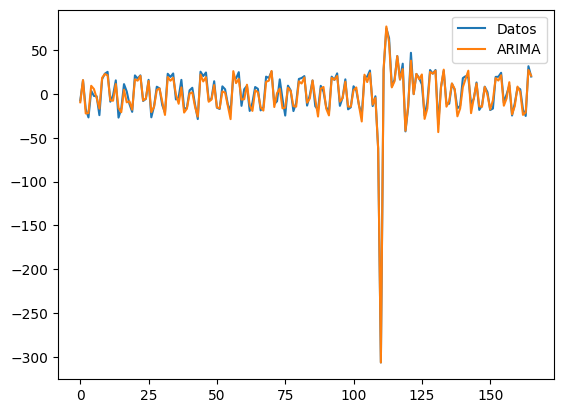

                     beta_hat      desv    t_stad    p_val
y_lag1               -0.10838   0.01685  -6.43247  0.00000
y_lag2               -0.18406   0.01791 -10.27565  0.00000
y_lag3               -0.19223   0.01602 -11.99663  0.00000
y_lag4               -0.10396   0.01675  -6.20771  0.00000
y_lag5               -0.22580   0.01701 -13.27331  0.00000
y_lag6               -0.17080   0.01615 -10.57740  0.00000
y_lag7               -0.11416   0.01667  -6.84715  0.00000
y_lag8               -0.17967   0.01718 -10.45676  0.00000
y_lag9               -0.12266   0.01795  -6.83469  0.00000
y_lag10              -0.07886   0.01762  -4.47634  0.00001
y_lag11              -0.25881   0.01989 -13.01139  0.00000
y_lag12               0.63303   0.02842  22.27684  0.00000
IPC_lag5             -0.27550   0.10514  -2.62033  0.00968
IPC_lag6              0.21654   0.10762   2.01212  0.04599
IPC_lag11             0.45330   0.10462   4.33295  0.00003
Tasa_delitos_lag0     0.25290   0.07802   3.24157  0.001

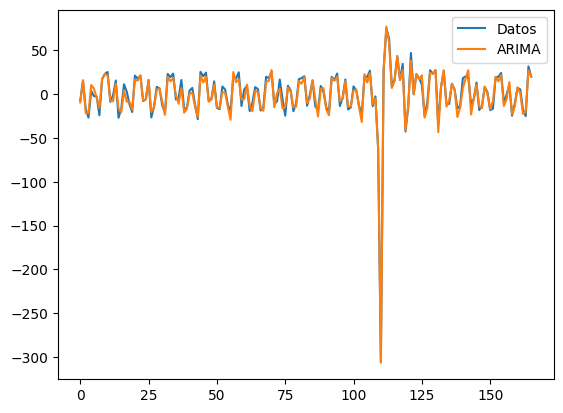

                     beta_hat      desv    t_stad    p_val
y_lag1               -0.10960   0.01702  -6.43976  0.00000
y_lag2               -0.18676   0.01806 -10.34360  0.00000
y_lag3               -0.19065   0.01618 -11.78495  0.00000
y_lag4               -0.10197   0.01690  -6.03403  0.00000
y_lag5               -0.21551   0.01640 -13.14095  0.00000
y_lag6               -0.16950   0.01631 -10.39291  0.00000
y_lag7               -0.11060   0.01676  -6.60010  0.00000
y_lag8               -0.18037   0.01736 -10.38768  0.00000
y_lag9               -0.11751   0.01796  -6.54448  0.00000
y_lag10              -0.07426   0.01766  -4.20554  0.00004
y_lag11              -0.25883   0.02011 -12.87306  0.00000
y_lag12               0.63430   0.02872  22.08845  0.00000
IPC_lag5             -0.30315   0.10536  -2.87722  0.00459
IPC_lag11             0.44107   0.10557   4.17807  0.00005
Tasa_delitos_lag0     0.23004   0.07802   2.94842  0.00370
Tasa_delitos_lag2    -0.28854   0.07937  -3.63542  0.000

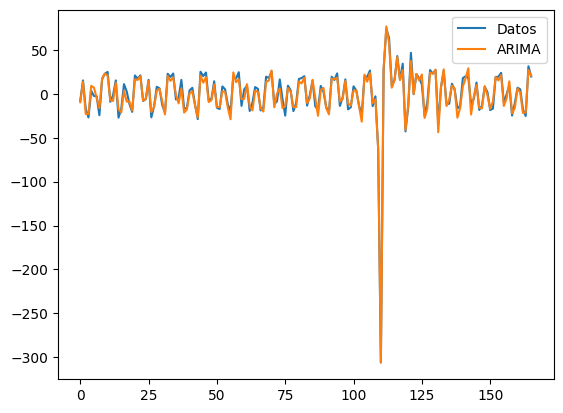

In [201]:
tabla = pulido(x1,y1,tablao,19)